# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Загрузка библиотек и чтение файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Получение информации о данных в файле:
1. Первые 15 строчек
2. Последние 15 строчек 
3. Случайные 15 строчек
4. Общая информация о каждом числовом столбце

In [2]:
pd.set_option('display.max_columns', None)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,False,False,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0


In [4]:
data.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11419,4,2500000.0,45.0,2017-12-03T00:00:00,1,NaN,2.0,30.0,2,NaN,False,False,9.0,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21065,0,5300000.0,49.0,2018-07-19T00:00:00,2,2.60,4.0,29.0,4,NaN,False,False,13.0,NaN,Санкт-Петербург,23196.0,4831.0,1.0,196.0,0.0,NaN,113.0
19205,8,4400000.0,54.9,2019-04-17T00:00:00,2,2.70,12.0,32.2,9,NaN,False,False,12.0,NaN,Санкт-Петербург,19185.0,20897.0,0.0,NaN,2.0,421.0,5.0
15629,18,900000.0,60.0,2018-06-27T00:00:00,3,NaN,3.0,NaN,1,NaN,False,False,NaN,NaN,поселок станции Лужайка,NaN,NaN,NaN,NaN,NaN,NaN,57.0
8897,10,7300000.0,69.0,2014-12-10T00:00:00,3,3.20,2.0,42.3,1,False,False,False,10.0,0.0,Петергоф,34799.0,29988.0,3.0,174.0,3.0,326.0,573.0
4167,6,2500000.0,32.4,2018-03-28T00:00:00,1,NaN,12.0,NaN,2,NaN,False,False,NaN,NaN,Колпино,26750.0,32536.0,1.0,1181.0,2.0,615.0,45.0
9392,3,19500000.0,195.7,2018-02-22T00:00:00,6,3.21,5.0,150.8,5,NaN,False,False,17.7,NaN,Санкт-Петербург,23932.0,4195.0,1.0,500.0,0.0,NaN,125.0
17449,20,1950000.0,28.2,2018-08-28T00:00:00,0,2.80,9.0,22.9,4,NaN,True,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20494,20,6900000.0,56.5,2018-02-01T00:00:00,2,2.50,14.0,35.7,9,NaN,False,False,7.6,NaN,Санкт-Петербург,7683.0,12925.0,1.0,336.0,0.0,NaN,376.0
1581,13,5150000.0,38.4,2018-09-17T00:00:00,1,NaN,25.0,20.0,13,False,False,False,10.4,2.0,Санкт-Петербург,17475.0,14943.0,2.0,456.0,0.0,NaN,42.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.duplicated().sum()

0

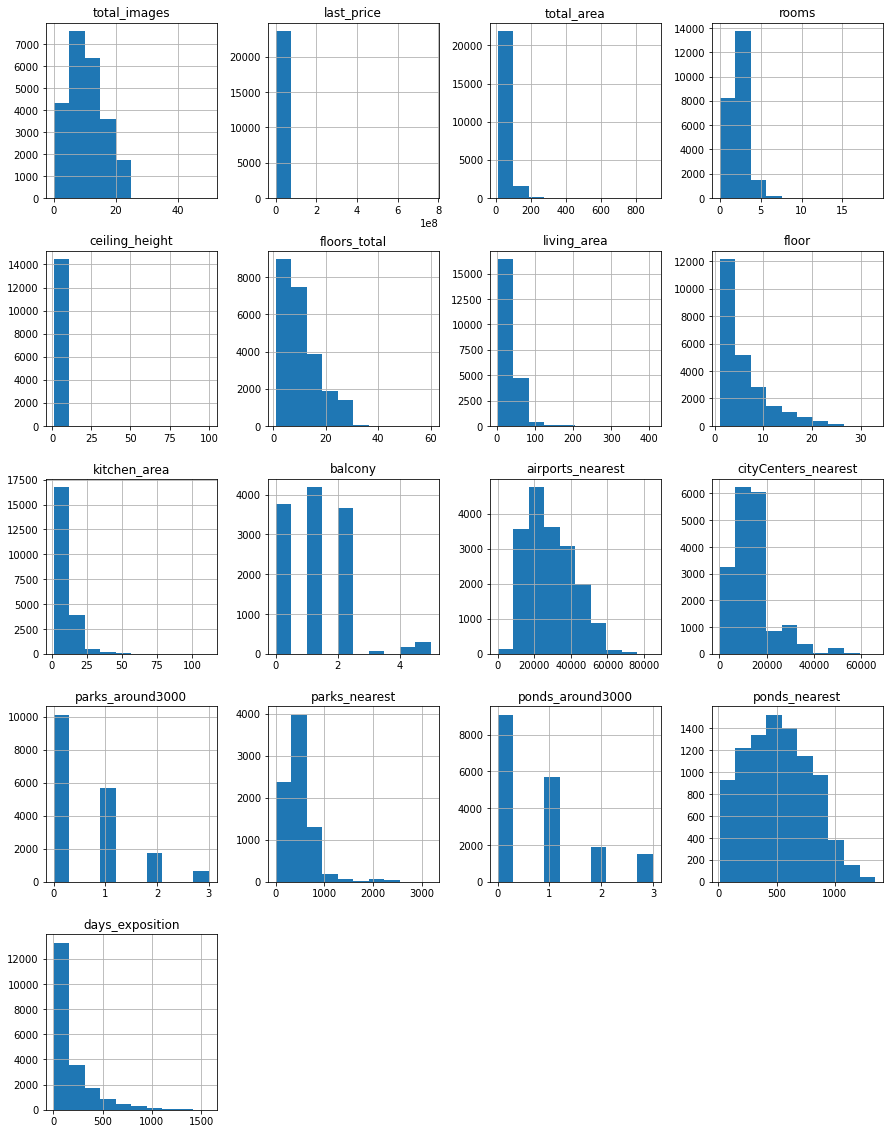

In [8]:
data.hist(figsize=(15, 20));

Промежуточный вывод:
1. В данных большое количество пропущенных значений
2. Явных дубликатов нет
3. Для некоторых столбцов некоректно выбран тип данных
4. Столбцы сгруппированы неверно 
5. Из гистаграммы можем заметить некоторые анамальные значения, например в столбце last_price, причину выясним в предобработке 

Первые строчки:
    total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.

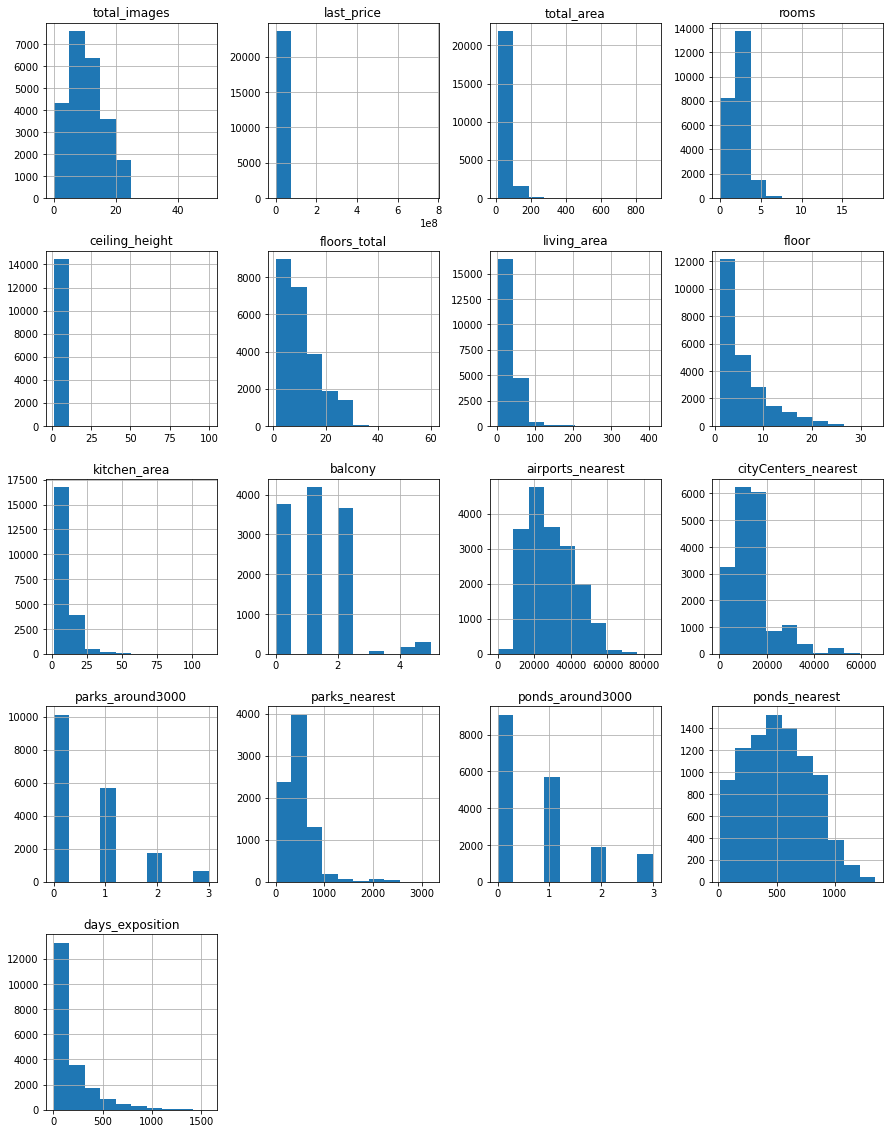

In [9]:
def analyze_dataframe(df):
    print("Первые строчки:\n", df.head())
    print("\nПоследние строчки:\n", df.tail())
    print("\nСлучайные строчки:\n", df.sample())
    print("\nИнформация о каждом столбце:\n", df.describe())
    print("\nОбщая информация:\n")
    df.info()
    print("\nЯвные дубликаты:\n", df.duplicated())
    print("\nСортировка и количество пропущенных значений:\n", df.isnull().sum().sort_values())
    print("\nГистограмма:\n")
    df.hist(figsize=(15, 20))
    plt.show()
    display
analyze_dataframe(data)


### Предобработка данных

Начнём с обработки порядка столбцов
Для этого расположу столбцы в логическом порядке:

1. Общая информация 

    locality_name — название населённого пункта
    last_price — цена на момент снятия с публикации
    total_images — число фотографий квартиры в объявлении
    total_area — общая площадь квартиры в квадратных метрах (м²)
    living_area — жилая площадь в квадратных метрах (м²)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    ceiling_height — высота потолков (м)
    floors_total — всего этажей в доме
    floor — этаж
    rooms — число комнат
2. Объекты рядом

    cityCenters_nearest — расстояние до центра города (м)
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)

3. Характеристические данные квартиры

    balcony — число балконов
    studio — квартира-студия (булев тип)
    open_plan — свободная планировка (булев тип)
    is_apartment — апартаменты (булев тип)
    total_images — число фотографий квартиры в объявлении
    first_day_exposition — дата публикации
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [10]:
data = data[['locality_name', 'last_price', 'total_images', 'first_day_exposition', 'days_exposition', 
             'total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'floors_total', 'floor', 'rooms', 
             'balcony', 'studio', 'open_plan', 'is_apartment', 'cityCenters_nearest', 'airports_nearest', 'parks_around3000', 
             'parks_nearest', 'ponds_around3000', 'ponds_nearest']]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   last_price            23699 non-null  float64
 2   total_images          23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   days_exposition       20518 non-null  float64
 5   total_area            23699 non-null  float64
 6   living_area           21796 non-null  float64
 7   kitchen_area          21421 non-null  float64
 8   ceiling_height        14504 non-null  float64
 9   floors_total          23613 non-null  float64
 10  floor                 23699 non-null  int64  
 11  rooms                 23699 non-null  int64  
 12  balcony               12180 non-null  float64
 13  studio                23699 non-null  bool   
 14  open_plan             23699 non-null  bool   
 15  is_apartment       

In [12]:
data.head(5)

,locality_name,last_price,total_images,first_day_exposition,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Санкт-Петербург,13000000.0,20,2019-03-07T00:00:00,NaN,108.0,51.0,25.0,2.70,16.0,8,3,NaN,False,False,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,3350000.0,7,2018-12-04T00:00:00,81.0,40.4,18.6,11.0,NaN,11.0,1,1,2.0,False,False,NaN,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,5196000.0,10,2015-08-20T00:00:00,558.0,56.0,34.3,8.3,NaN,5.0,4,2,0.0,False,False,NaN,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64900000.0,0,2015-07-24T00:00:00,424.0,159.0,NaN,NaN,NaN,14.0,9,3,0.0,False,False,NaN,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10000000.0,2,2018-06-19T00:00:00,121.0,100.0,32.0,41.0,3.03,14.0,13,2,NaN,False,False,NaN,8098.0,31856.0,2.0,112.0,1.0,48.0


Определю пропущенные значения
Заполненю пропущенные значения там, где это возможно

In [13]:
data.isnull().sum().sort_values() 

floor                       0
last_price                  0
total_images                0
first_day_exposition        0
open_plan                   0
total_area                  0
studio                      0
rooms                       0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Исходя из пропусков, сделаю следующее:
1. Удалю квартиры без местоположения, такие квартиры обычному пользователю не нужны
2. Проверю, как можно заменить пропуски в floors_total, возможно здание одноэтажное или на основе других данных о квартире можно будет определить сколько этаже в здании
3. iving_area, kitchen_area: можно заполнить пропущенные значения медианным значением жилой или кухонной площади соответственно в зависимости от количества комнат и общей площади квартиры
4. Для столбца days_exposition Если есть дата публикации - заменить пропуск медианным значением относительно даты публикации, в ином случае удалить
5. Для ponds_around3000 parks_around3000 - пропуски заменить нулями, если автор объявления не указал количество, скорей всего рядом водоёмов и парков нет
6. Для cityCenters_nearest, airports_nearest, parks_nearest, ponds_nearest: Посчитать расстояние для каждого случая очень проблематично, тк не знаем конкретное расположение дома, поэтому оставим значения без изменения
7. Для balcony - заменить нулями, если автор не указал, значит балкона нет
8. Для is_apartment - заменить на False, если автор не указал, скорей всего квартира имеет другой тип
9. Для ceiling_height - пропуски заполним медианными значениями 

In [14]:
data = data.dropna(subset=['locality_name'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         23650 non-null  object 
 1   last_price            23650 non-null  float64
 2   total_images          23650 non-null  int64  
 3   first_day_exposition  23650 non-null  object 
 4   days_exposition       20470 non-null  float64
 5   total_area            23650 non-null  float64
 6   living_area           21752 non-null  float64
 7   kitchen_area          21381 non-null  float64
 8   ceiling_height        14490 non-null  float64
 9   floors_total          23565 non-null  float64
 10  floor                 23650 non-null  int64  
 11  rooms                 23650 non-null  int64  
 12  balcony               12137 non-null  float64
 13  studio                23650 non-null  bool   
 14  open_plan             23650 non-null  bool   
 15  is_apartment       

Изучим пропуски в столбце floors_total

In [16]:
nan_floors_total = data.loc[data['floors_total'].isnull(), 'floor'].count
print(nan_floors_total)

<bound method Series.count of 186       4
237       1
457      12
671       8
1757      9
         ..
22542     3
22656    20
22808     6
23590    18
23658     8
Name: floor, Length: 85, dtype: int64>


А всего пропусков 86, тогда строчку где не известны и floors_total и floor удалим, с отсальными поступи следующим образом:
1. Если этаж от 1 до 5 включительно - максимумальный - 5 этаж
2. Если этаж от 5 до 9 включительно - максимальный - 9 этаж
3. Если этажей больше 9, то максимальный - этаж не меньше тажа, на котором расположена квартира

In [17]:
data = data.dropna(subset=['floors_total', 'floor'], how='all')

In [18]:
def get_max_floor(row):
    if row['floor'] <= 5:
        return 5
    elif row['floor'] <= 9:
        return 9
    else:
        return row['floor']

In [19]:
mask = data['floors_total'].isna()
data.loc[mask, 'floors_total'] = data[mask].apply(get_max_floor, axis=1)

In [20]:
def fill_missing_areas(data):
    for index, row in data.iterrows():
        if pd.isnull(row['living_area']):
            median = data[(data['rooms'] == row['rooms']) & (data['total_area'] >= row['total_area']-5) & (data['total_area'] <= row['total_area']+5)]['living_area'].median()
            data.at[index, 'living_area'] = median
        if pd.isnull(row['kitchen_area']):
            median = data[(data['rooms'] == row['rooms']) & (data['total_area'] >= row['total_area']-5) & (data['total_area'] <= row['total_area']+5)]['kitchen_area'].median()
            data.at[index, 'kitchen_area'] = median
    return data
data = fill_missing_areas(data)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Ошибки в следствии наличия пустых значений для схожих квартир, заполнить их не является возможным, поэтому удалим эти строчки

In [21]:
data = data.dropna(subset=['living_area'])
data = data.dropna(subset=['kitchen_area'])

In [22]:
data['publication_date'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
median_days = data.groupby('publication_date')['days_exposition'].median()
data['days_exposition'] = data.apply(lambda row: median_days[row['publication_date']] if pd.isnull(row['days_exposition']) and row['publication_date'] in median_days.index else row['days_exposition'], axis=1)

In [23]:
print(data['days_exposition'].isnull().sum())

111


Для оставшихся подставить медианное значение невозможно, оставим строчки без изменения

In [24]:
#Заменяем пропущенный значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

7. Для balcony - заменить нулями, если автор не указал, значит балкона нет
8. Для is_apartment - заменить на False, если автор не указал, скорей всего квартира имеет другой тип

In [25]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

9. Для ceiling_height - пропуски заполним медианными значениями 

In [26]:
median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

В итоге получим следующие данные:

In [27]:
data.isnull().sum().sort_values() 

locality_name               0
ponds_around3000            0
parks_around3000            0
is_apartment                0
open_plan                   0
studio                      0
balcony                     0
floor                       0
floors_total                0
rooms                       0
kitchen_area                0
living_area                 0
total_area                  0
first_day_exposition        0
total_images                0
last_price                  0
ceiling_height              0
publication_date            0
days_exposition           111
cityCenters_nearest      5430
airports_nearest         5453
ponds_nearest           14429
parks_nearest           15408
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23433 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23433 non-null  object        
 1   last_price            23433 non-null  float64       
 2   total_images          23433 non-null  int64         
 3   first_day_exposition  23433 non-null  object        
 4   days_exposition       23322 non-null  float64       
 5   total_area            23433 non-null  float64       
 6   living_area           23433 non-null  float64       
 7   kitchen_area          23433 non-null  float64       
 8   ceiling_height        23433 non-null  float64       
 9   floors_total          23433 non-null  float64       
 10  floor                 23433 non-null  int64         
 11  rooms                 23433 non-null  int64         
 12  balcony               23433 non-null  float64       
 13  studio          

Изменение типа данных 
1. В столбеце publication_date хранятся значения столбца first_day_exposition - удалим столбец first_day_exposition и оставим столбец с более подходящим типом данных - publication_date
2. Для столбцов balcony,floors_total, parks_around3000, ponds_around3000 можно заменить тип данных на int, так как число балконов является целочисленным значением.
3. Стоимость квартир достаточно велика и в большинстве своём имеют целочисленные значение, в ином случае копейки составляют очень малый процент от стоимость квартиры, изменим тип с float на int
4. Для столбцов parks_nearest< ponds_nearest, cityCenters_nearest можно заменить тип данных на int, так как значения в метрах, а значит знаки после запятой составляют малый процент от всего числа.
5. Исключением является ceiling_height - где значения невелики, а значит изменение типа сильно скажется на качестве данных

In [29]:
#1
data.drop('first_day_exposition', axis=1, inplace=True)
data.rename(columns={'publication_date': 'first_day_exposition'}, inplace=True)

In [30]:
#2-4
columns_to_int = ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000', 'last_price', 
                  'parks_nearest', 'ponds_nearest', 'cityCenters_nearest', 'airports_nearest']

for column in columns_to_int:
    data[column] = pd.to_numeric(data[column], errors='coerce').astype('Int64')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23433 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23433 non-null  object        
 1   last_price            23433 non-null  Int64         
 2   total_images          23433 non-null  int64         
 3   days_exposition       23322 non-null  float64       
 4   total_area            23433 non-null  float64       
 5   living_area           23433 non-null  float64       
 6   kitchen_area          23433 non-null  float64       
 7   ceiling_height        23433 non-null  float64       
 8   floors_total          23433 non-null  Int64         
 9   floor                 23433 non-null  int64         
 10  rooms                 23433 non-null  int64         
 11  balcony               23433 non-null  Int64         
 12  studio                23433 non-null  bool          
 13  open_plan       

Проверим получившуюся таблицу внешне

In [32]:
data.head(5)

,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
0,Санкт-Петербург,13000000,20,29.0,108.0,51.0,25.0,2.70,16,8,3,0,False,False,False,16028,18863,1,482,2,755,2019-03-07
1,посёлок Шушары,3350000,7,81.0,40.4,18.6,11.0,2.65,11,1,1,2,False,False,False,18603,12817,0,<NA>,0,<NA>,2018-12-04
2,Санкт-Петербург,5196000,10,558.0,56.0,34.3,8.3,2.65,5,4,2,0,False,False,False,13933,21741,1,90,2,574,2015-08-20
3,Санкт-Петербург,64900000,0,424.0,159.0,88.0,22.0,2.65,14,9,3,0,False,False,False,6800,28098,2,84,3,234,2015-07-24
4,Санкт-Петербург,10000000,2,121.0,100.0,32.0,41.0,3.03,14,13,2,0,False,False,False,8098,31856,2,112,1,48,2018-06-19


Столбец days_exposition также можно преобразовать к int 

In [33]:
#В данном случае привести к типу Int64 - не получается из-за ошибок, поэтому заменил пропуски нулями, 
#в будущем при анализе нужно будет учитывать это
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23433 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         23433 non-null  object        
 1   last_price            23433 non-null  Int64         
 2   total_images          23433 non-null  int64         
 3   days_exposition       23322 non-null  Int64         
 4   total_area            23433 non-null  float64       
 5   living_area           23433 non-null  float64       
 6   kitchen_area          23433 non-null  float64       
 7   ceiling_height        23433 non-null  float64       
 8   floors_total          23433 non-null  Int64         
 9   floor                 23433 non-null  int64         
 10  rooms                 23433 non-null  int64         
 11  balcony               23433 non-null  Int64         
 12  studio                23433 non-null  bool          
 13  open_plan       

Начнём выполнение следующего:
1. устранены неявные дубликаты в названиях населённых пунктов
2. устранены редкие и выбивающиеся значения (аномалии) во всех столбцах

In [35]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
data['locality_name'].nunique()

362

На первый взгляд может помочь изменение регистра и замена букв ё на е

In [37]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [38]:
data['locality_name'].nunique()

328

В итоге удалили 34 дубля. Могу быть дубли из-за орфографических ошибок, неправильном написании поселок ромагки/деревня ромашки - такие дубли трудно найти, поэтому оставляем данные без изменения.

Начнём удаление аномальных значений. Это можно сделать только для численных столбцов, а именно:

last_price Int64         
total_images int64 - аномальные значения в данном столбце       
days_exposition  int64         
total_area   float64       
living_area  float64       
kitchen_area   float64       
ceiling_height  float64       
floors_total   Int64         
floor  int64         
rooms  int64         
balcony  Int64   
*данные сложные в поиске и преобразовании аномалей
cityCenters_nearest  Int64         
airports_nearest  Int64         
parks_around3000  Int64         
parks_nearest    Int64         
ponds_around3000   Int64         
ponds_nearest   Int64       
*Оставим без изменения 

first_day_exposition  datetime64[ns]



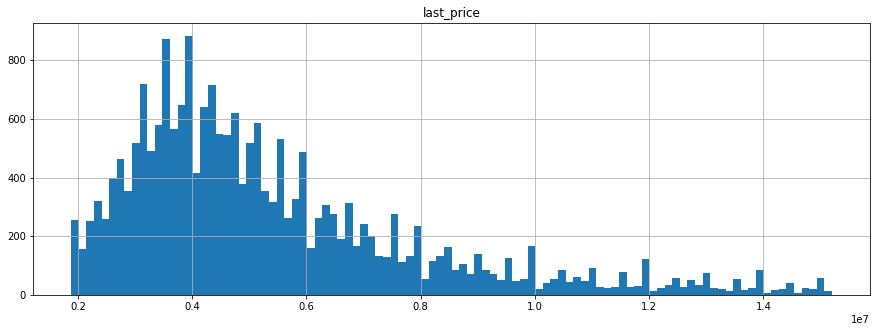

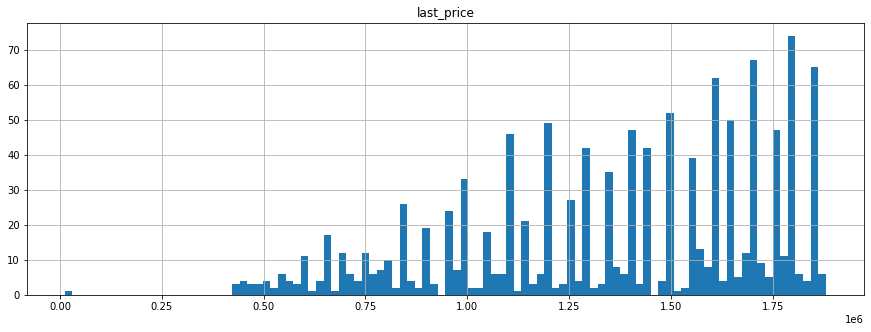

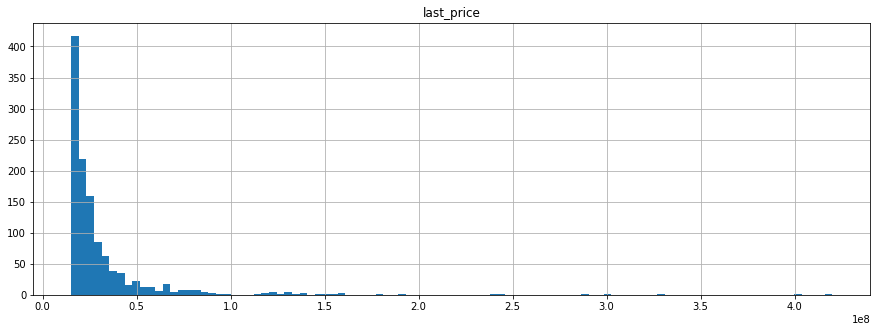

In [39]:
data = data.sort_values(by='last_price')

# Вычисляем границы квантилей 5% и 95%
q05 = data['last_price'].quantile(0.05)
q95 = data['last_price'].quantile(0.95)

# Ограничиваем значения столбца 'last_price' по границам квантилей
data90 = data[(data['last_price'] >= q05) & (data['last_price'] <= q95)]

# Строим гистограмму по ограниченным значениям
data90.hist('last_price', bins=100, figsize=(15,5))
plt.show()
min_price_data = data.query('last_price <= @q05')
min_price_data.hist('last_price', bins=100, figsize=(15, 5))
plt.show()
max_price_data = data.query('last_price >= @q95')
max_price_data.hist('last_price', bins=100, figsize=(15, 5))
plt.show()

In [40]:
data90

,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
22535,тихвин,1880000,8,42,50.10,27.6,9.50,2.65,9,4,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-08-01
17588,поселок мурино,1880000,8,314,25.63,18.7,6.00,2.65,27,14,1,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-07-25
11303,гатчина,1880000,11,83,30.90,17.3,5.50,2.50,5,2,1,1,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-09-16
5427,деревня старосиверская,1880000,6,186,53.00,29.0,8.30,2.50,5,2,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2016-02-12
18223,поселок пудость,1888000,9,120,70.00,45.0,12.00,3.00,2,2,3,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,санкт-петербург,15190500,9,22,159.90,122.1,10.20,3.00,6,4,5,0,False,False,False,2793,23252,0,<NA>,0,<NA>,2019-03-12
5477,санкт-петербург,15200000,12,88,96.00,34.5,34.19,2.70,16,7,3,0,False,False,False,7953,15903,1,1053,0,<NA>,2018-03-23
11910,санкт-петербург,15200000,18,119,117.00,64.0,15.00,2.65,23,3,3,1,False,False,False,14721,51030,0,<NA>,0,<NA>,2017-06-21
13346,санкт-петербург,15200000,20,168,101.00,58.4,16.40,2.75,25,13,3,0,False,False,False,12097,36575,1,610,1,654,2018-01-16


In [41]:
min_price_data

,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
8793,санкт-петербург,12190,7,8,109.00,32.000,40.5,2.75,25,25,2,0,False,False,False,9176,36421,1,805,0,<NA>,2019-03-20
14911,поселок станции свирь,430000,5,44,54.00,30.700,9.0,2.65,3,3,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-06-26
17456,сланцы,430000,7,4,30.40,16.000,6.0,2.65,2,1,1,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2019-04-22
16274,деревня старополье,440000,18,45,40.00,18.000,10.0,2.65,5,1,1,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-07-10
16219,деревня вахнова кара,450000,14,45,38.50,27.365,6.0,2.65,2,1,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,санкт-петербург,1870000,4,45,20.00,14.000,2.0,2.50,5,1,1,0,False,False,False,15654,16652,1,619,1,937,2018-03-06
22535,тихвин,1880000,8,42,50.10,27.600,9.5,2.65,9,4,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-08-01
17588,поселок мурино,1880000,8,314,25.63,18.700,6.0,2.65,27,14,1,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-07-25
11303,гатчина,1880000,11,83,30.90,17.300,5.5,2.50,5,2,1,1,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-09-16


In [42]:
max_price_data

,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
5477,санкт-петербург,15200000,12,88,96.0,34.5,34.19,2.70,16,7,3,0,False,False,False,7953,15903,1,1053,0,<NA>,2018-03-23
11910,санкт-петербург,15200000,18,119,117.0,64.0,15.00,2.65,23,3,3,1,False,False,False,14721,51030,0,<NA>,0,<NA>,2017-06-21
13346,санкт-петербург,15200000,20,168,101.0,58.4,16.40,2.75,25,13,3,0,False,False,False,12097,36575,1,610,1,654,2018-01-16
19592,санкт-петербург,15200000,6,9,119.0,83.0,13.40,2.90,4,3,4,0,False,False,False,1397,20043,3,520,3,228,2018-11-13
11667,санкт-петербург,15276000,2,90,160.8,100.4,29.90,3.00,4,3,3,2,False,False,False,18167,53674,0,<NA>,2,189,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,санкт-петербург,289238400,18,17,187.5,63.7,30.20,3.37,6,6,2,0,False,False,False,1073,22494,3,386,3,188,2019-03-19
15651,санкт-петербург,300000000,20,111,618.0,258.0,70.00,3.40,7,5,7,0,False,False,False,5297,32440,0,<NA>,2,198,2017-12-18
1436,санкт-петербург,330000000,19,233,190.0,95.0,40.00,3.50,7,5,3,0,False,False,False,1197,23011,3,519,3,285,2018-04-04
14706,санкт-петербург,401300000,15,393,401.0,204.0,24.00,2.65,9,9,5,3,False,False,False,2389,21912,1,545,1,478,2016-02-20


Цены устраивают, кроме:
1. Аномально минимальное значение в 12190 - строчек с таким значение 1
2. Аномально большие значение >= 100 млн рублей с таким значение - 33

In [43]:
count = data.query('last_price >= 1.0e8').shape[0]
print(f"Количество строк, где 'last_price' >= 1.0e8: {count}")

Количество строк, где 'last_price' >= 1.0e8: 33


Удалим аномальные значения

In [44]:
data = data.drop(index=data[data['last_price'] == 12190].index)
data = data.drop(index=data[data['last_price'] > 1.0e8].index)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

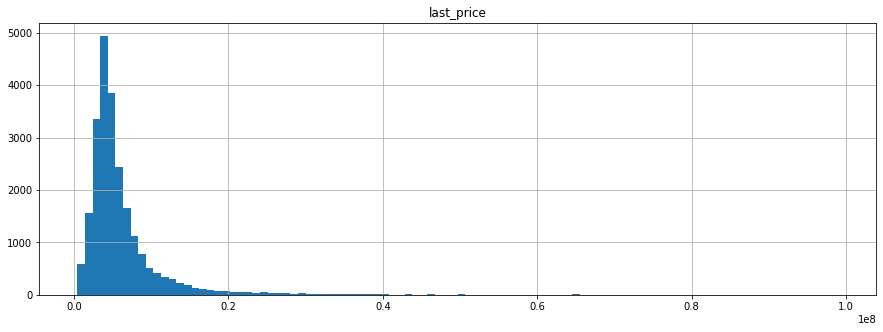

In [45]:
data.hist('last_price', bins=100, figsize=(15, 5))

Данные цен после 40 млн также выглядят выбивающимимся

In [46]:
count = data.query('last_price >= 0.4e8').shape[0]
print(f"Количество строк, где 'last_price' >= 0.4e8: {count}")

Количество строк, где 'last_price' >= 0.4e8: 151


Таких значений немного - удалим

In [47]:
data = data.drop(index=data[data['last_price'] > 0.4e8].index)

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

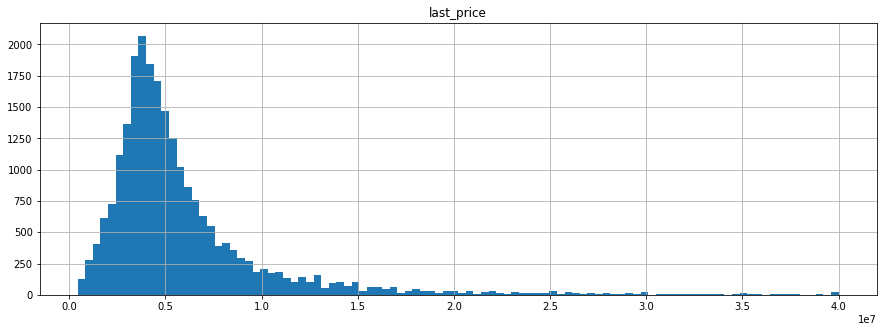

In [48]:
data.hist('last_price', bins=100, figsize=(15, 5))

Теперь данные о ценах выглядят хорошо.

Исследуем значения в столбце: days_exposition, помним, что нулевые значения - данные которых нет

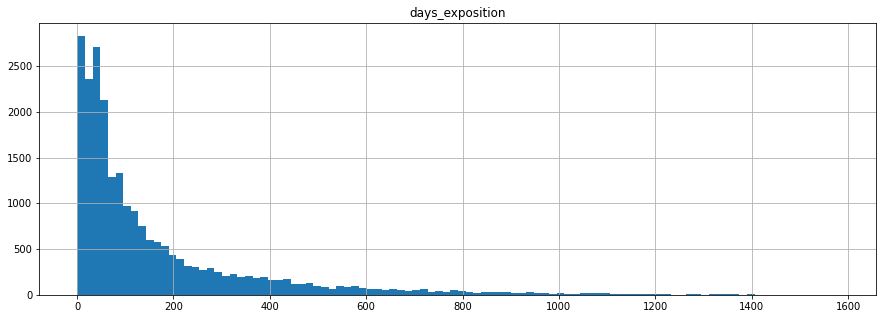

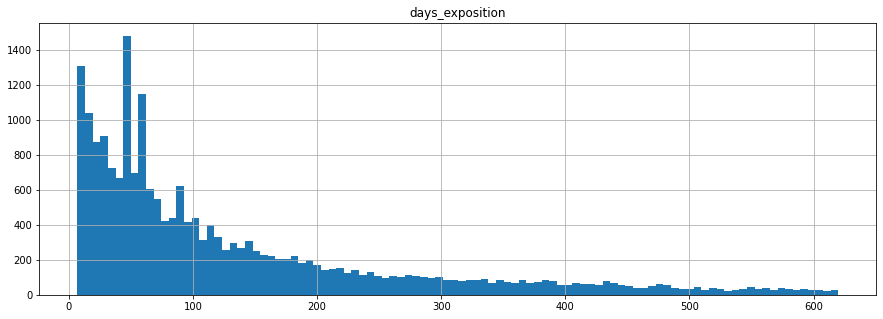

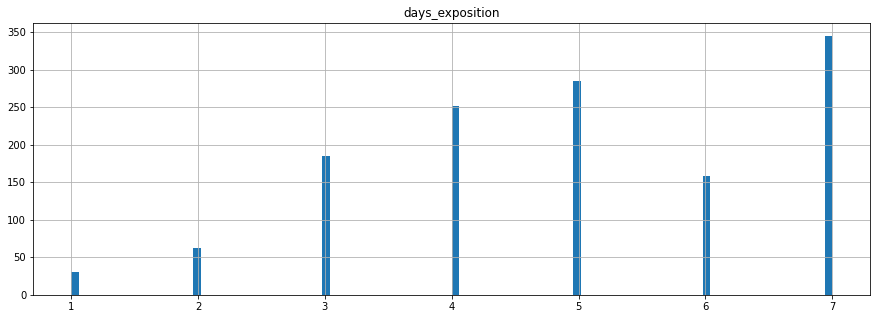

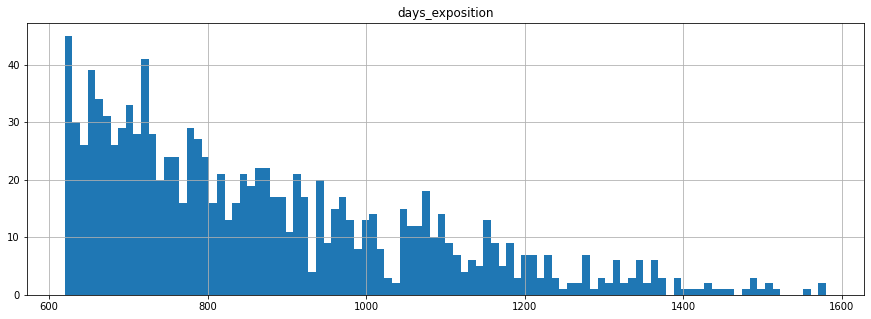

In [49]:
data = data.sort_values(by='days_exposition')

# Вычисляем границы квантилей 5% и 95%
q05 = data['days_exposition'].quantile(0.05)
q95 = data['days_exposition'].quantile(0.95)

# Ограничиваем значения столбца 'days_exposition' по границам квантилей
data90 = data[(data['days_exposition'] >= q05) & (data['days_exposition'] <= q95)]

data.hist('days_exposition', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('days_exposition', bins=100, figsize=(15,5))
plt.show()
min_days_exposition_data = data.query('days_exposition <= @q05')
min_days_exposition_data.hist('days_exposition', bins=100, figsize=(15, 5))
plt.show()
max_days_exposition_data = data.query('days_exposition >= @q95')
max_days_exposition_data.hist('days_exposition', bins=100, figsize=(15, 5))
plt.show()

Из графивков видем значение больше 1000 - выбивающиеся

In [50]:
count = data.query('days_exposition >= 1000').shape[0]
print(f"Количество строк, где ''days_exposition' >= 1000: {count}")

Количество строк, где ''days_exposition' >= 1000: 282


Удалим строчки где значение больше 1000, а также где нулевые значения

In [51]:
data = data.drop(index=data[data['days_exposition'] == 0].index)
data = data.drop(index=data[data['days_exposition'] > 1000].index)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

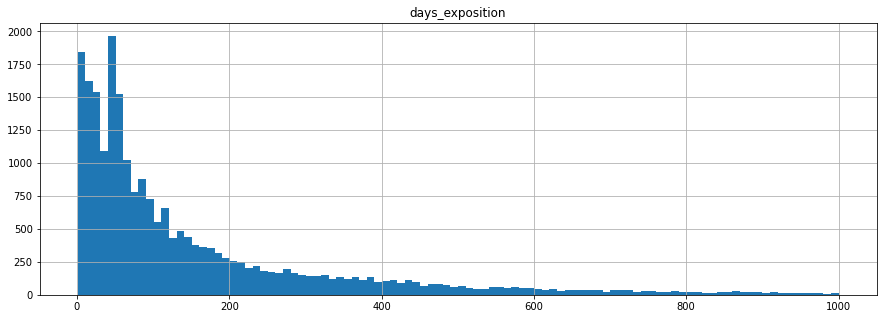

In [52]:
data.hist('days_exposition', bins=100, figsize=(15,5))

Теперь данные выглядят хорошо

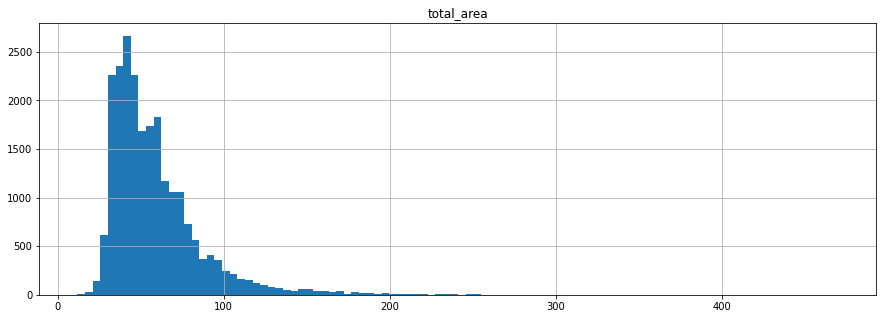

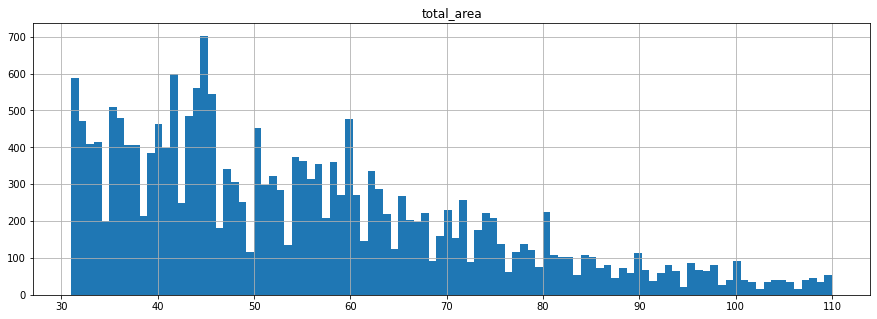

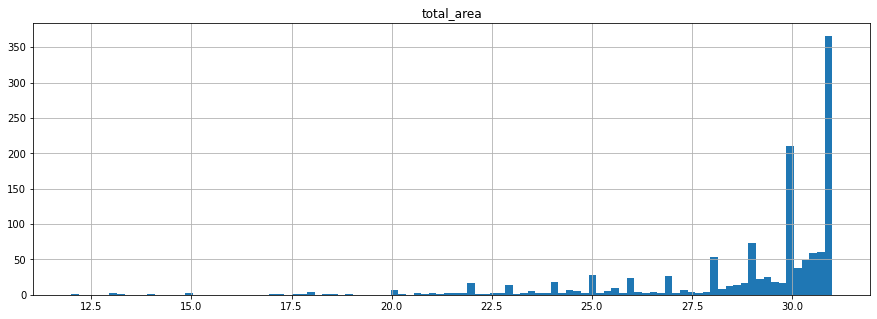

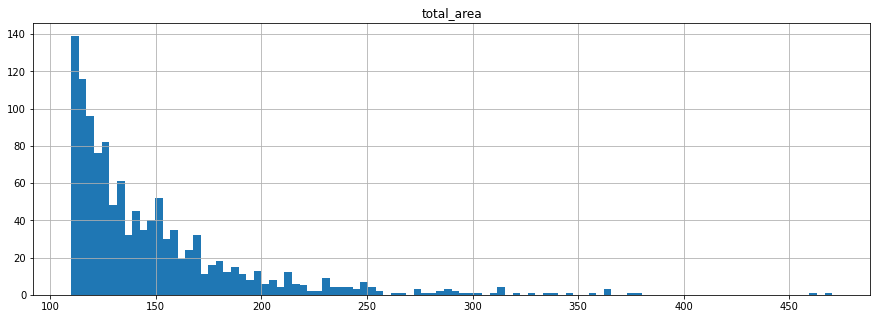

In [53]:
data = data.sort_values(by='total_area')

# Вычисляем границы квантилей 5% и 95%
q05 = data['total_area'].quantile(0.05)
q95 = data['total_area'].quantile(0.95)

# Ограничиваем значения столбца 'total_area' по границам квантилей
data90 = data[(data['total_area'] >= q05) & (data['total_area'] <= q95)]
data.hist('total_area', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('total_area', bins=100, figsize=(15,5))
plt.show()
min_total_area_data = data.query('total_area <= @q05')
min_total_area_data.hist('total_area', bins=100, figsize=(15, 5))
plt.show()
max_total_area_data = data.query('total_area >= @q95')
max_total_area_data.hist('total_area', bins=100, figsize=(15, 5))
plt.show()

Аномальные:
1. '>200' 
2. '<27'


удалим

In [54]:
data = data.drop(index=data[data['total_area'] <27].index)
data = data.drop(index=data[data['total_area'] > 200].index)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

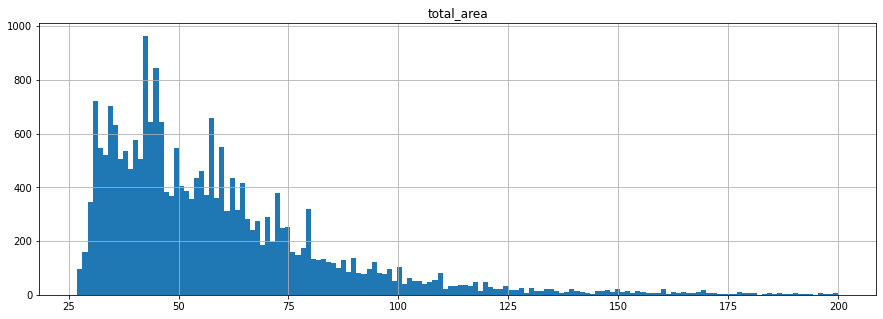

In [55]:
data.hist('total_area', bins=150, figsize=(15,5))

Теперь данные выглядь неплохо, различные пики возможно связаны с местоположением или успешно/неуспешно подобранной ценной

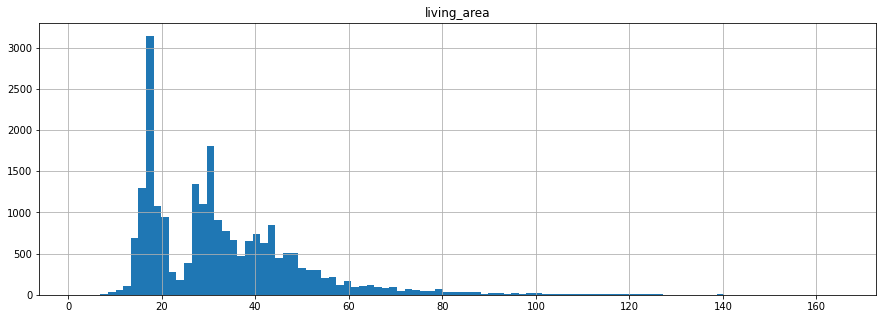

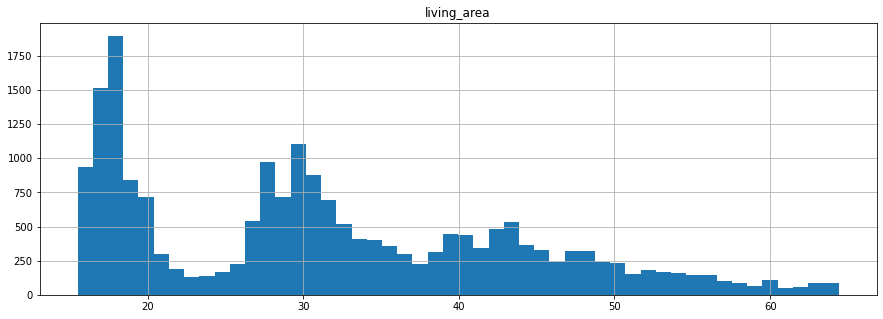

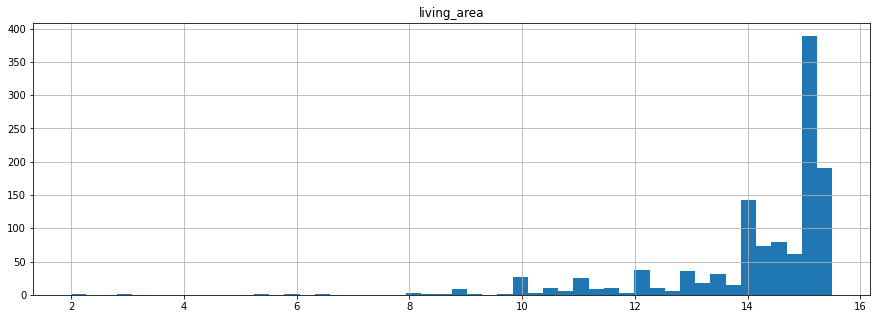

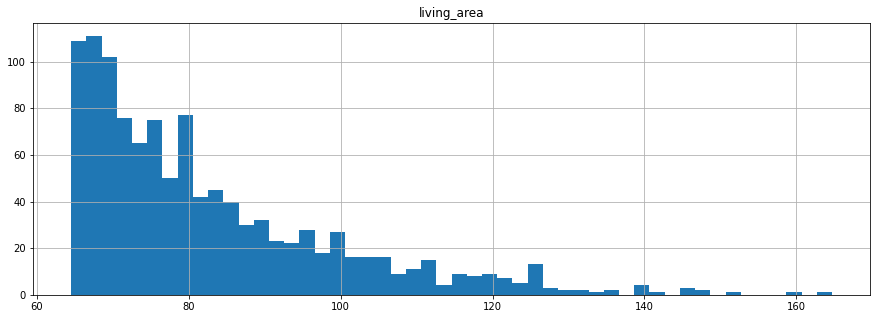

In [56]:
data = data.sort_values(by='living_area')

# Вычисляем границы квантилей 5% и 95%
q05 = data['living_area'].quantile(0.05)
q95 = data['living_area'].quantile(0.95)

# Ограничиваем значения столбца 'last_price' по границам квантилей
data90 = data[(data['living_area'] >= q05) & (data['living_area'] <= q95)]

data.hist('living_area', bins=100, figsize=(15,5))

# Строим гистограмму по ограниченным значениям
data90.hist('living_area', bins=50, figsize=(15,5))
plt.show()
min_living_area_data = data.query('living_area <= @q05')
min_living_area_data.hist('living_area', bins=50, figsize=(15, 5))
plt.show()
max_living_area_data = data.query('living_area >= @q95')
max_living_area_data.hist('living_area', bins=50, figsize=(15, 5))
plt.show()

Аномальные - > 100 и < 14

In [57]:
data = data.drop(index=data[data['living_area'] < 14].index)
data = data.drop(index=data[data['living_area'] > 100].index)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

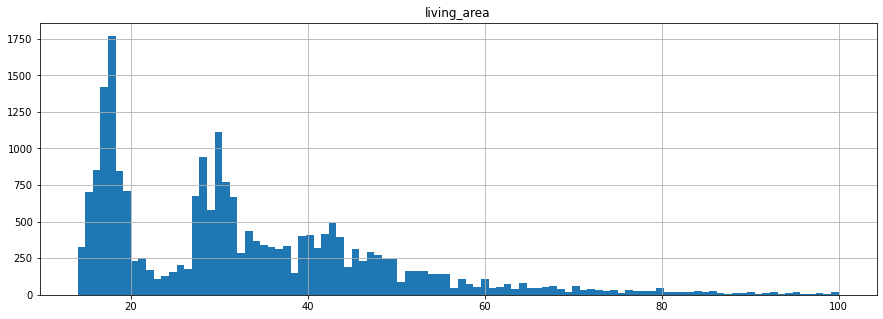

In [58]:
data.hist('living_area', bins=100, figsize=(15,5))

Теперь данные выглядят хорошо, просадка в райное 20-30 связанна с редкостью квартир с такой площадью

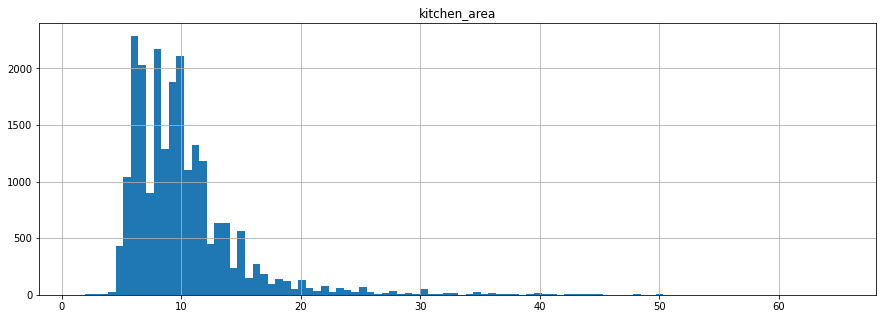

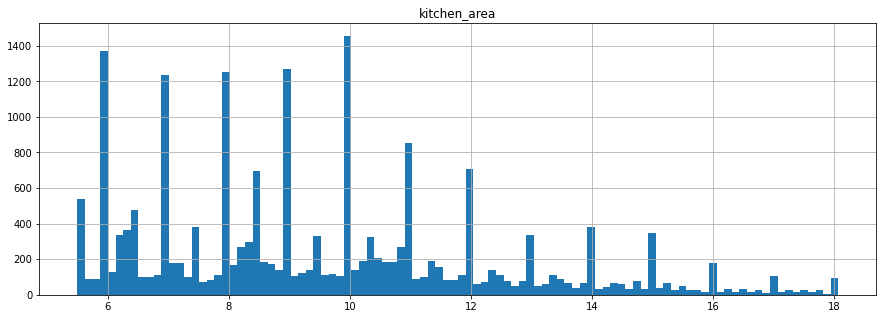

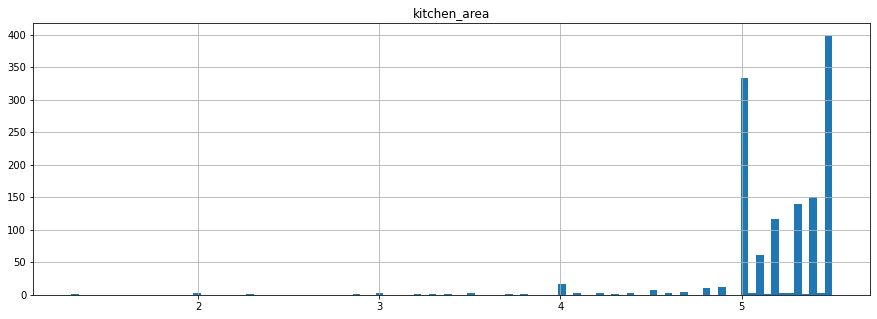

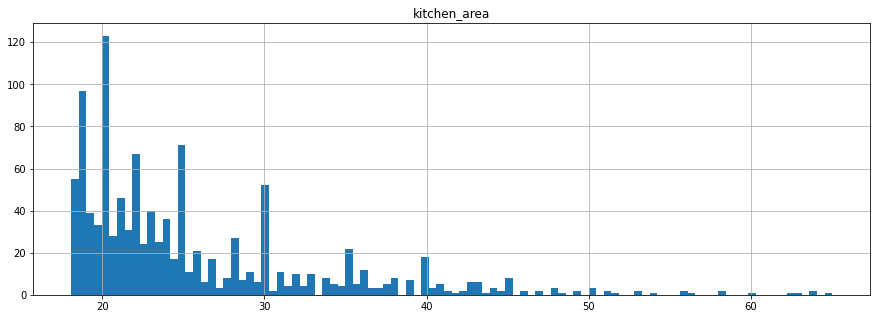

In [59]:
data = data.sort_values(by='kitchen_area')

# Вычисляем границы квантилей 5% и 95%
q05 = data['kitchen_area'].quantile(0.05)
q95 = data['kitchen_area'].quantile(0.95)

# Ограничиваем значения столбца 'kitchen_area' по границам квантилей
data90 = data[(data['kitchen_area'] >= q05) & (data['kitchen_area'] <= q95)]
data.hist('kitchen_area', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('kitchen_area', bins=100, figsize=(15,5))
plt.show()
min_kitchen_area_data = data.query('kitchen_area <= @q05')
min_kitchen_area_data.hist('kitchen_area', bins=100, figsize=(15, 5))
plt.show()
max_kitchen_area_data = data.query('kitchen_area >= @q95')
max_kitchen_area_data.hist('kitchen_area', bins=100, figsize=(15, 5))
plt.show()

Аномальные > 40 и < 5
1. удалим всё, что > 40
2. проверим более подробно значения меньше 5 

In [60]:
count = len(data.loc[data['kitchen_area'] < 5])
print(f'Количество строк, где значение столбца "kitchen_area" меньше 5: {count}')
data.loc[data['kitchen_area'] < 5].iloc[45:75]


Количество строк, где значение столбца "kitchen_area" меньше 5: 77


,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
422,кириши,1700000,8,72,55.2,38.5,4.5,2.50,5,5,3,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-03-24
298,гатчина,2650000,9,49,42.8,30.0,4.5,2.65,5,3,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-04-25
13119,ломоносов,2850000,4,558,39.0,27.0,4.5,2.50,2,2,2,0,False,False,False,51401,47976,0,<NA>,0,<NA>,2015-11-11
11217,поселок городского типа рахья,2750000,10,28,47.7,33.0,4.6,2.80,2,2,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-07-10
17138,кировск,1800000,13,5,30.7,21.1,4.6,2.65,4,3,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2019-04-19
21020,волхов,1700000,10,50,56.9,42.8,4.6,3.00,2,2,3,4,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-12-12
6200,сестрорецк,3150000,8,110,31.1,17.6,4.7,2.60,3,2,1,1,False,False,False,36297,61078,1,436,2,577,2017-07-10
5514,поселок романовка,1680000,17,99,32.0,18.6,4.7,2.55,5,5,1,1,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-09-04
7436,поселок городского типа павлово,2890000,17,293,57.1,39.0,4.7,2.50,5,3,3,1,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2016-02-26
2684,ломоносов,2650000,18,107,31.0,17.6,4.7,2.54,5,4,1,0,False,False,False,52304,48879,0,<NA>,1,563,2017-04-09


Гипотеза, что это особенные квартиры(студии и так далее) не подтвердилась - удаляем

In [61]:
data = data.drop(index=data[data['kitchen_area'] > 40].index)
data = data.drop(index=data[data['kitchen_area'] < 5].index)

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

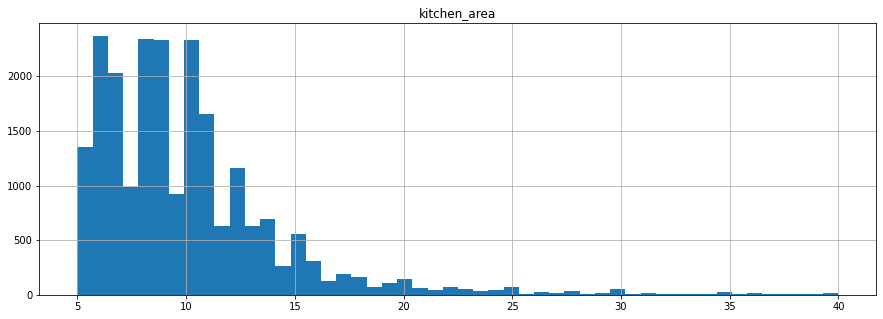

In [62]:
data.hist('kitchen_area', bins=50, figsize=(15,5))

Теперь данные выглядят неплохо

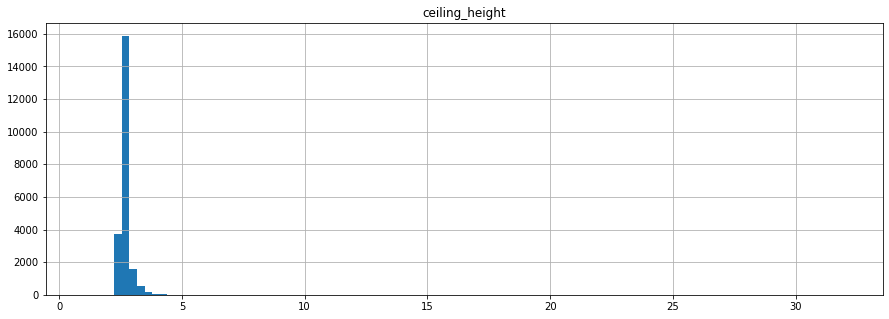

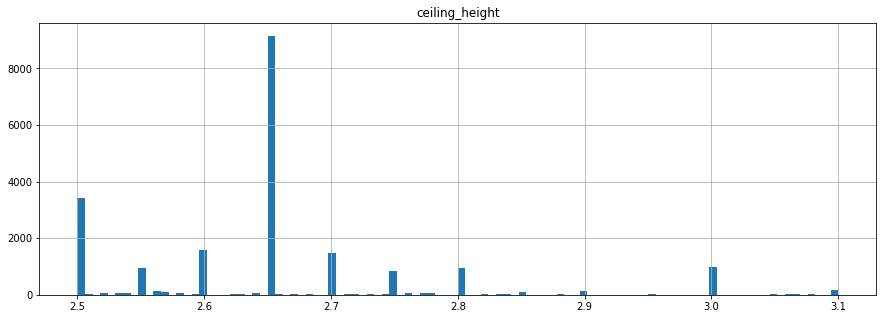

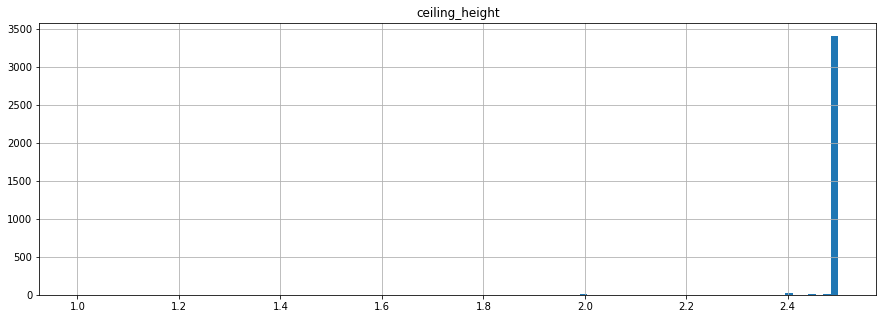

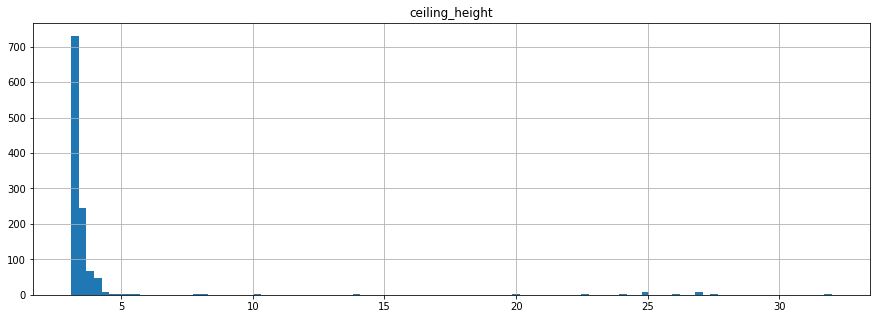

In [63]:
data = data.sort_values(by='ceiling_height')

# Вычисляем границы квантилей 5% и 95%
q05 = data['ceiling_height'].quantile(0.05)
q95 = data['ceiling_height'].quantile(0.95)

# Ограничиваем значения столбца 'ceiling_height' по границам квантилей
data90 = data[(data['ceiling_height'] >= q05) & (data['ceiling_height'] <= q95)]

data.hist('ceiling_height', bins=100, figsize=(15,5))

# Строим гистограмму по ограниченным значениям
data90.hist('ceiling_height', bins=100, figsize=(15,5))
plt.show()
min_ceiling_height_data = data.query('ceiling_height <= @q05')
min_ceiling_height_data.hist('ceiling_height', bins=100, figsize=(15, 5))
plt.show()
max_ceiling_height_data = data.query('ceiling_height >= @q95')
max_ceiling_height_data.hist('ceiling_height', bins=100, figsize=(15, 5))
plt.show()

Аномальные - > 3.2, минимальные значения стоит проверить
Максимальные значения проверим нет ли описки - значения больше 20 (значения меньше означают, что этажи < 2.0 - что считается аномалией), значения меньше 20, но больше 3.2 - удаляем как аномальные

In [64]:
data[data['ceiling_height'] > 20]

,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
20507,санкт-петербург,5950000,12,40,60.0,35.0,13.0,22.6,14,11,2,1,False,False,False,12570,27028,0,<NA>,0,<NA>,2018-02-19
5076,санкт-петербург,3850000,0,7,30.5,19.5,5.5,24.0,5,1,1,0,False,False,True,8389,29686,3,397,1,578,2018-10-03
18545,санкт-петербург,3750000,6,12,43.0,29.0,6.4,25.0,5,3,2,0,False,False,False,8033,27054,1,540,0,<NA>,2019-03-18
4643,санкт-петербург,4300000,0,181,45.0,30.0,7.0,25.0,9,2,2,1,False,False,False,13256,12016,1,658,1,331,2018-02-01
9379,санкт-петербург,3950000,5,213,42.0,30.0,5.2,25.0,5,2,3,0,False,False,False,13581,11647,0,<NA>,0,<NA>,2017-03-26
355,гатчина,3600000,17,259,55.2,32.0,9.0,25.0,5,2,2,2,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-07-12
14382,поселок новый свет,1700000,9,206,35.0,20.0,8.0,25.0,5,2,1,1,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2015-12-04
11285,луга,1950000,0,18,37.0,17.0,9.0,25.0,5,4,1,2,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2019-03-20
6246,кронштадт,3300000,6,15,44.4,31.3,5.7,25.0,5,5,2,0,False,False,False,50649,68923,1,417,2,73,2019-03-25
5669,санкт-петербург,4400000,4,267,50.0,21.3,7.0,26.0,9,3,2,2,False,False,False,10912,28981,1,305,0,<NA>,2017-08-08


Действительно, выглядит как описка - восстановим коректное значений

In [65]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x > 20 else x)

In [66]:
data[data['ceiling_height'] < 2.4]

,locality_name,last_price,total_images,days_exposition,total_area,living_area,kitchen_area,ceiling_height,floors_total,floor,rooms,balcony,studio,open_plan,is_apartment,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition
22590,санкт-петербург,6000000,16,13,55.00,32.400000,10.00,1.00,12,7,2,0,False,False,False,14217,33053,2,293,2,289,2018-10-31
5712,городской поселок мга,1500000,5,248,42.80,27.500000,5.20,1.20,2,1,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-08-14
16934,санкт-петербург,4100000,5,71,40.00,17.400000,8.34,1.75,37,5,1,0,False,False,False,20444,18732,0,<NA>,3,80,2017-10-17
552,санкт-петербург,2999000,11,270,33.50,17.500000,6.50,2.00,15,6,1,0,False,False,False,11746,33972,1,520,1,949,2017-03-30
16446,санкт-петербург,12300000,6,22,88.30,63.900000,12.00,2.00,5,2,3,0,False,False,False,7675,38415,1,568,1,154,2019-03-12
4212,тосно,2120000,1,36,35.43,16.600000,8.80,2.00,18,9,1,2,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2017-12-18
22960,всеволожск,2300000,17,60,53.60,19.000000,10.00,2.00,2,1,2,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-10-18
20520,кудрово,3600000,9,62,38.00,15.000000,11.80,2.00,12,9,1,1,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-07-05
16884,выборг,1500000,0,6,33.00,20.000000,6.00,2.00,5,5,1,0,False,False,False,<NA>,<NA>,0,<NA>,0,<NA>,2018-10-03
11352,поселок металлострой,3300000,4,53,36.00,15.200000,10.10,2.00,17,12,1,0,False,False,False,26980,25268,0,<NA>,0,<NA>,2017-06-18


Значение < 2.4 - аномальные

In [67]:
data = data.drop(index=data[data['ceiling_height'] <2.4].index)
data = data.drop(index=data[data['ceiling_height'] > 3.2 ].index)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

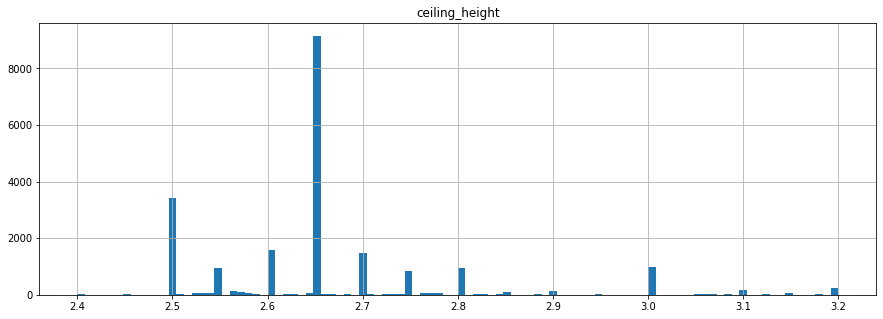

In [68]:
data.hist('ceiling_height', bins=100, figsize=(15,5))

Теперь данные выглядят хорошо

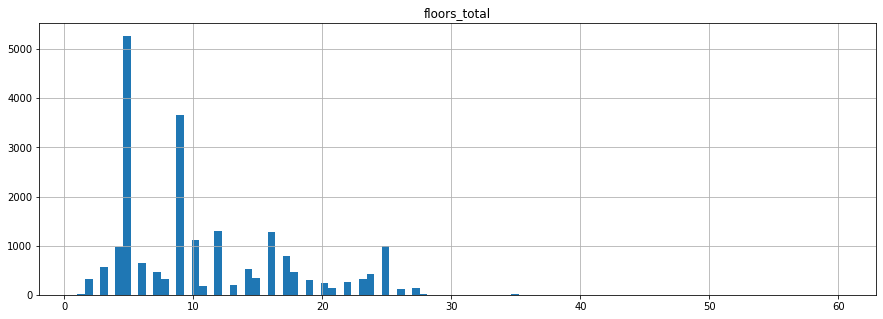

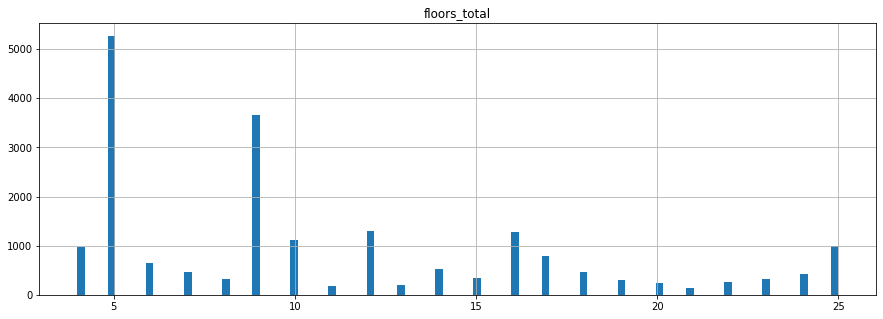

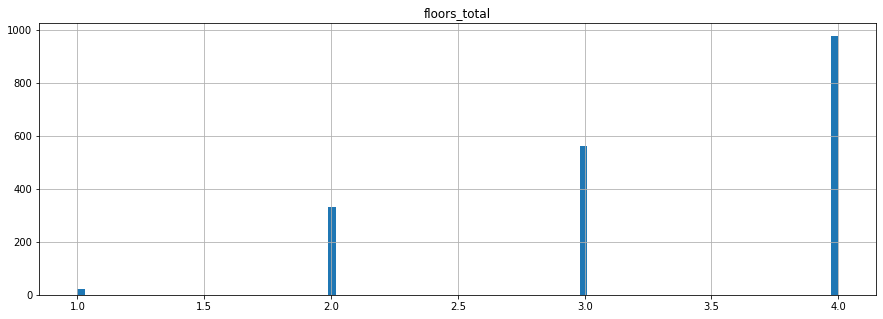

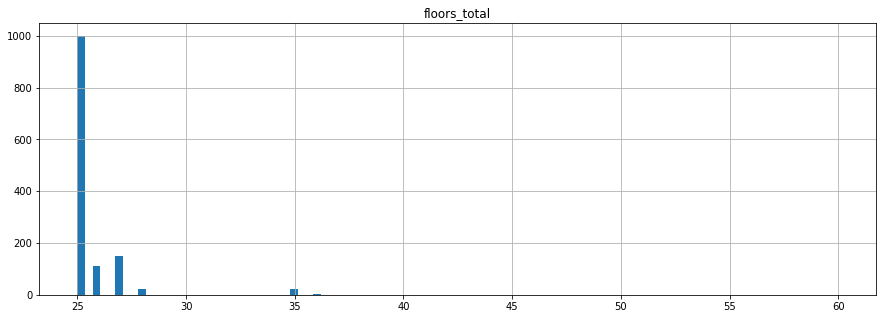

In [69]:
data = data.sort_values(by='floors_total')

# Вычисляем границы квантилей 5% и 95%
q05 = data['floors_total'].quantile(0.05)
q95 = data['floors_total'].quantile(0.95)

# Ограничиваем значения столбца 'floors_total' по границам квантилей
data90 = data[(data['floors_total'] >= q05) & (data['floors_total'] <= q95)]
data.hist('floors_total', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('floors_total', bins=100, figsize=(15,5))
plt.show()
min_floors_total_data = data.query('floors_total <= @q05')
min_floors_total_data.hist('floors_total', bins=100, figsize=(15, 5))
plt.show()
max_floors_total_data = data.query('floors_total >= @q95')
max_floors_total_data.hist('floors_total', bins=100, figsize=(15, 5))
plt.show()

Так как в спб есть очень высокие новостройки, так и очень маленькие здания в центре города - данные хорошие - аномалий нет

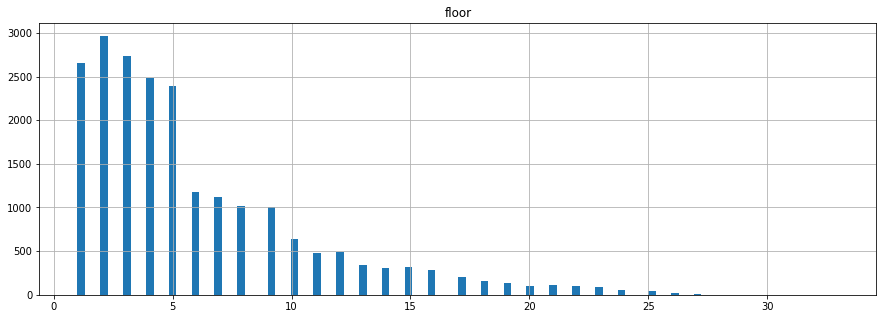

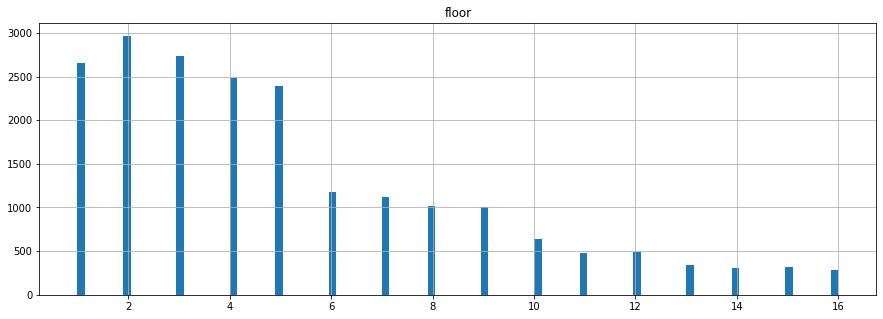

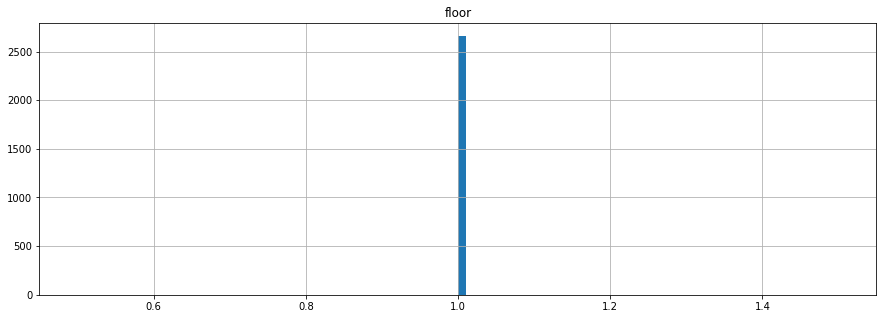

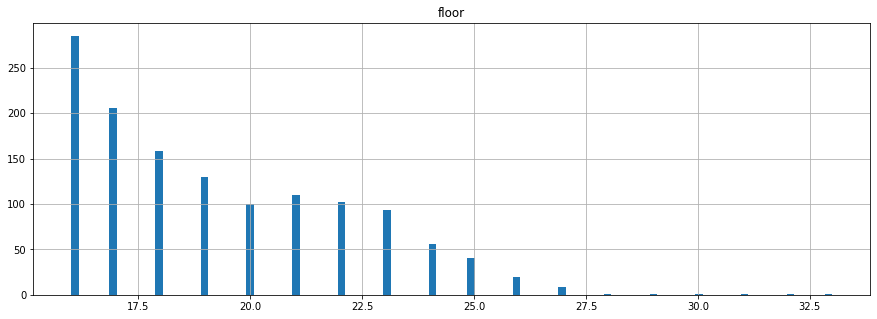

In [70]:
data = data.sort_values(by='floor')

# Вычисляем границы квантилей 5% и 95%
q05 = data['floor'].quantile(0.05)
q95 = data['floor'].quantile(0.95)

# Ограничиваем значения столбца 'floors_total' по границам квантилей
data90 = data[(data['floor'] >= q05) & (data['floor'] <= q95)]
data.hist('floor', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('floor', bins=100, figsize=(15,5))
plt.show()
min_floor_data = data.query('floor <= @q05')
min_floor_data.hist('floor', bins=100, figsize=(15, 5))
plt.show()
max_floor_data = data.query('floor >= @q95')
max_floor_data.hist('floor', bins=100, figsize=(15, 5))
plt.show()

Аномалий нет

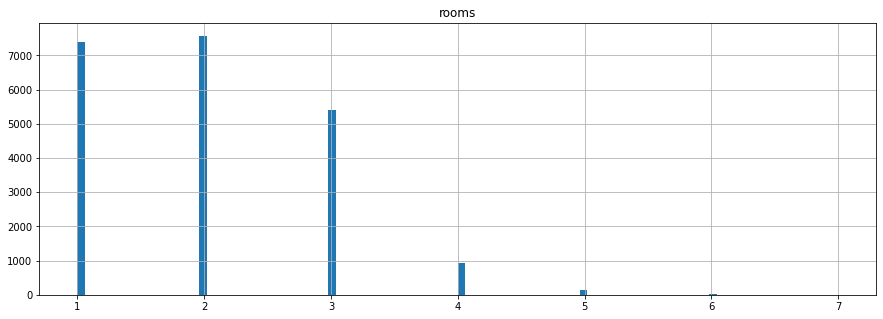

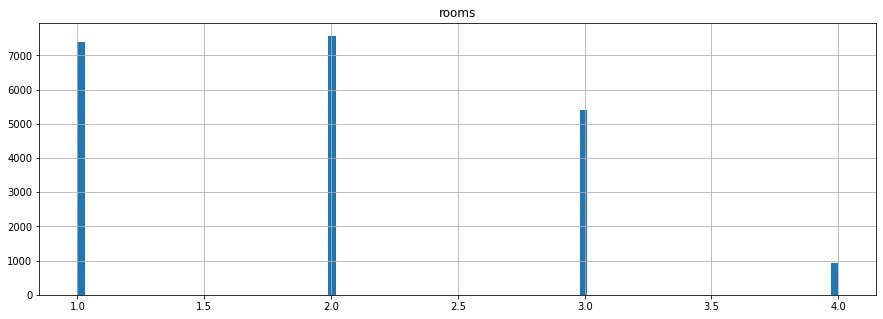

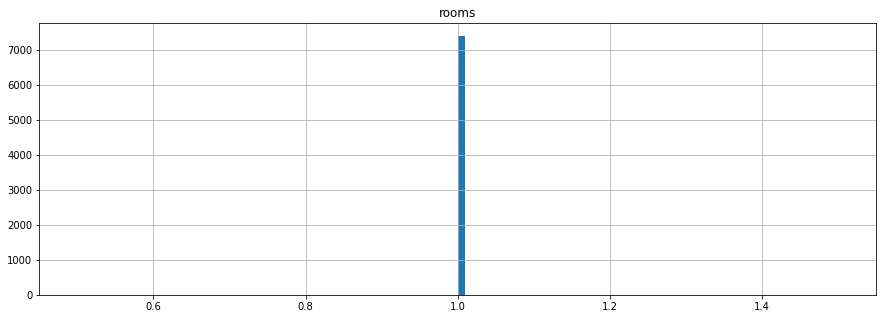

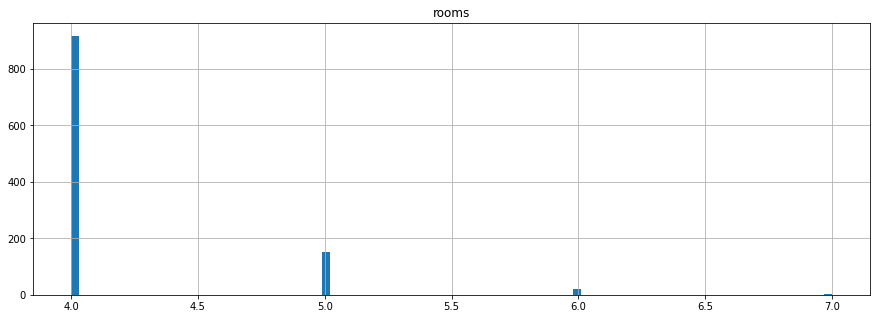

In [71]:
data = data.sort_values(by='rooms')

# Вычисляем границы квантилей 5% и 95%
q05 = data['rooms'].quantile(0.05)
q95 = data['rooms'].quantile(0.95)

# Ограничиваем значения столбца 'roomsl' по границам квантилей
data90 = data[(data['rooms'] >= q05) & (data['rooms'] <= q95)]
data.hist('rooms', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('rooms', bins=100, figsize=(15,5))
plt.show()
min_rooms_data = data.query('rooms <= @q05')
min_rooms_data.hist('rooms', bins=100, figsize=(15, 5))
plt.show()
max_rooms_data = data.query('rooms >= @q95')
max_rooms_data.hist('rooms', bins=100, figsize=(15, 5))
plt.show()

Аномалий нет

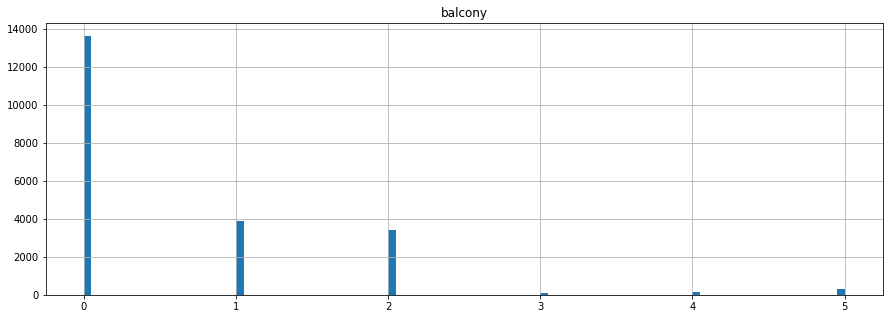

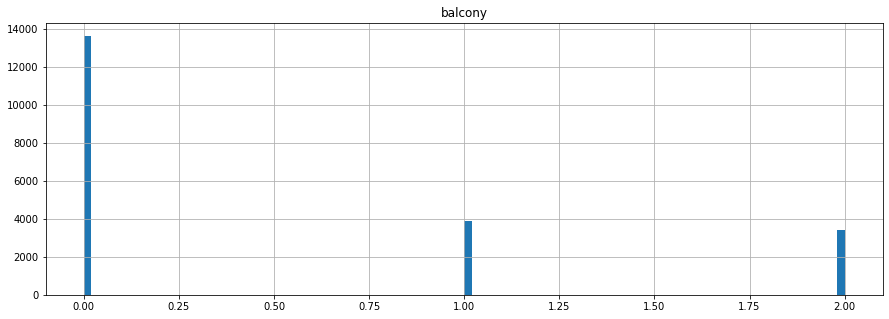

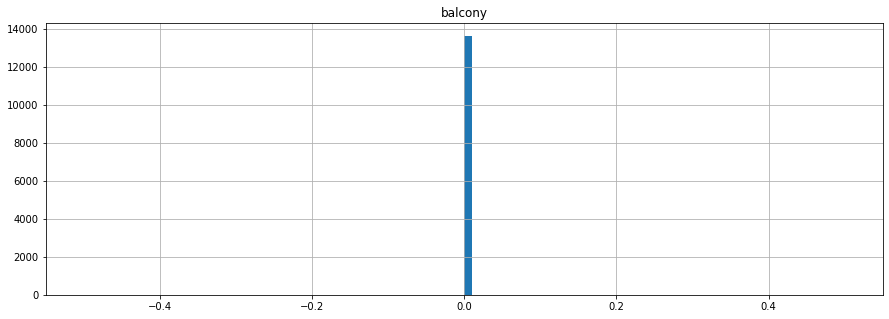

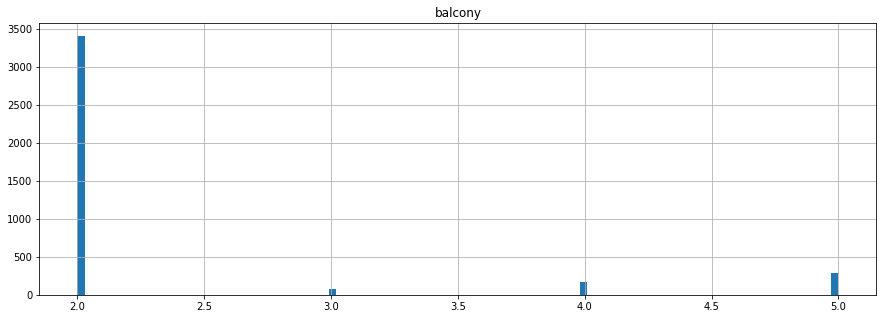

In [72]:
data = data.sort_values(by='balcony')

# Вычисляем границы квантилей 5% и 95%
q05 = data['balcony'].quantile(0.05)
q95 = data['balcony'].quantile(0.95)

# Ограничиваем значения столбца 'balcony' по границам квантилей
data90 = data[(data['balcony'] >= q05) & (data['balcony'] <= q95)]
data.hist('balcony', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('balcony', bins=100, figsize=(15,5))
plt.show()
min_balcony_data = data.query('balcony <= @q05')
min_balcony_data.hist('balcony', bins=100, figsize=(15, 5))
plt.show()
max_balcony_data = data.query('balcony >= @q95')
max_balcony_data.hist('balcony', bins=100, figsize=(15, 5))
plt.show()

Нулевые значения - отсутствие балкона, аномалий нет

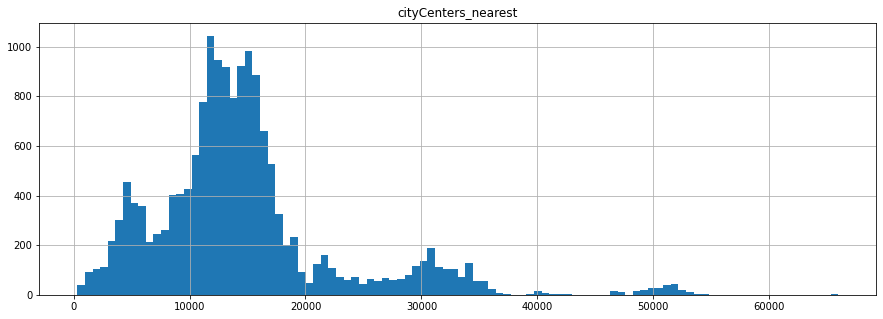

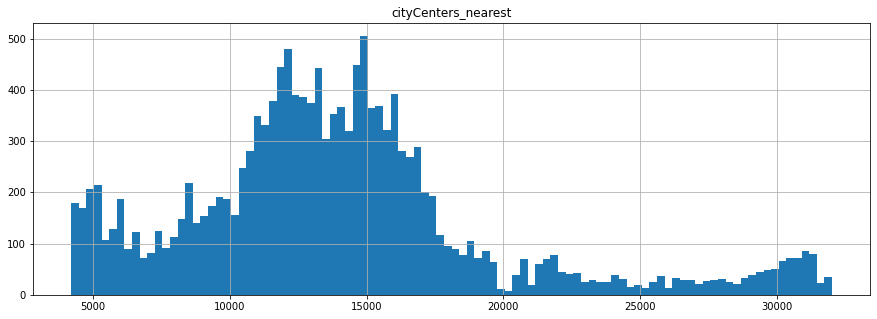

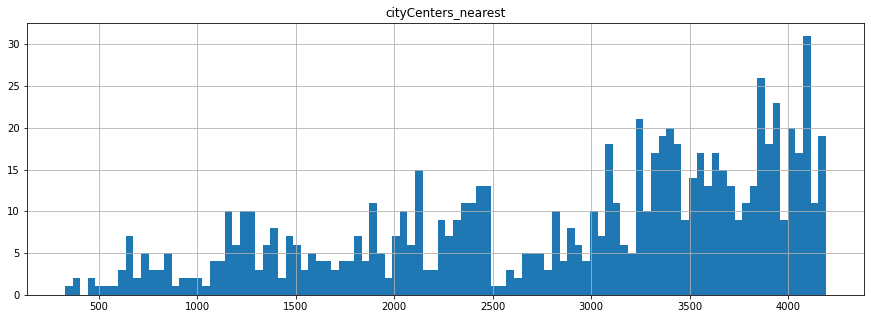

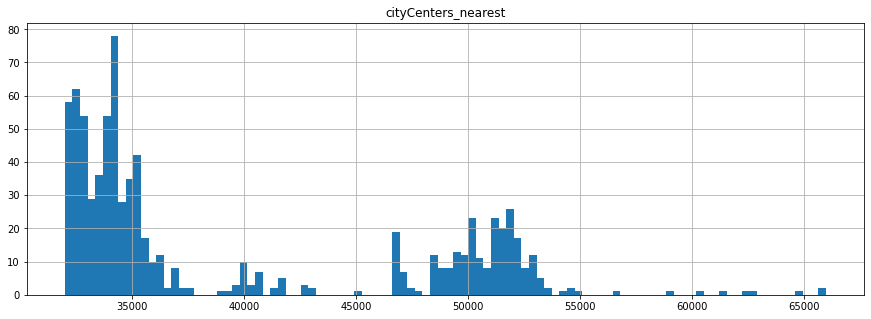

In [73]:
data = data.sort_values(by='cityCenters_nearest')

# Вычисляем границы квантилей 5% и 95%
q05 = data['cityCenters_nearest'].quantile(0.05)
q95 = data['cityCenters_nearest'].quantile(0.95)

# Ограничиваем значения столбца 'cityCenters_nearest' по границам квантилей
data90 = data[(data['cityCenters_nearest'] >= q05) & (data['cityCenters_nearest'] <= q95)]
data.hist('cityCenters_nearest', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('cityCenters_nearest', bins=100, figsize=(15,5))
plt.show()
min_cityCenters_nearest_data = data.query('cityCenters_nearest <= @q05')
min_cityCenters_nearest_data.hist('cityCenters_nearest', bins=100, figsize=(15, 5))
plt.show()
max_cityCenters_nearest_data = data.query('cityCenters_nearest >= @q95')
max_cityCenters_nearest_data.hist('cityCenters_nearest', bins=100, figsize=(15, 5))
plt.show()


Аномалий нет

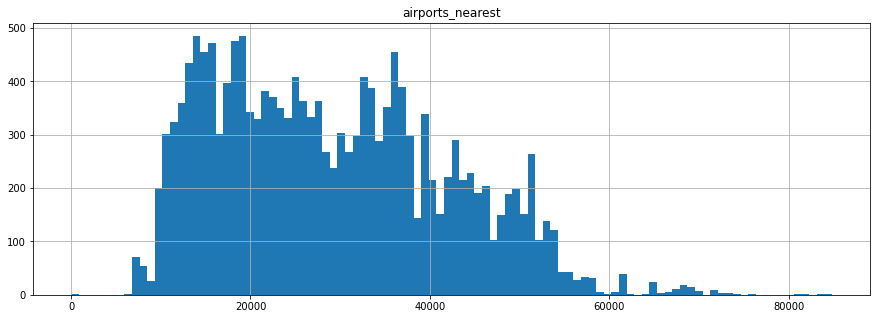

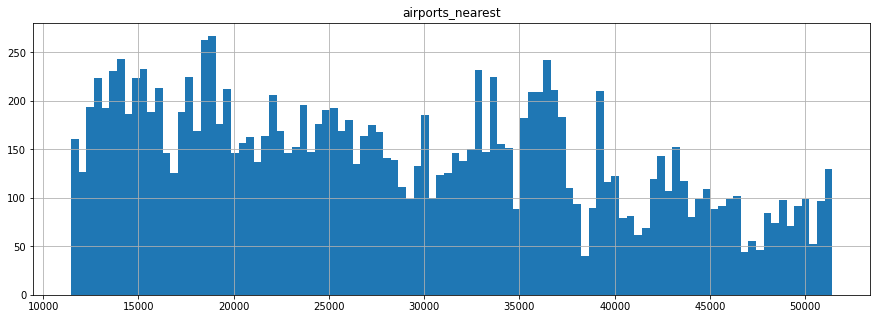

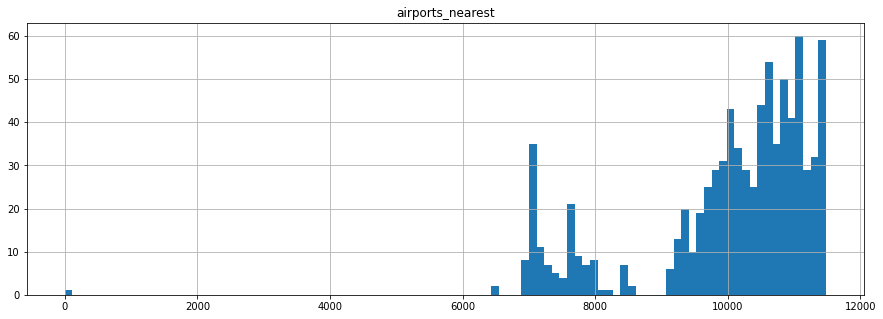

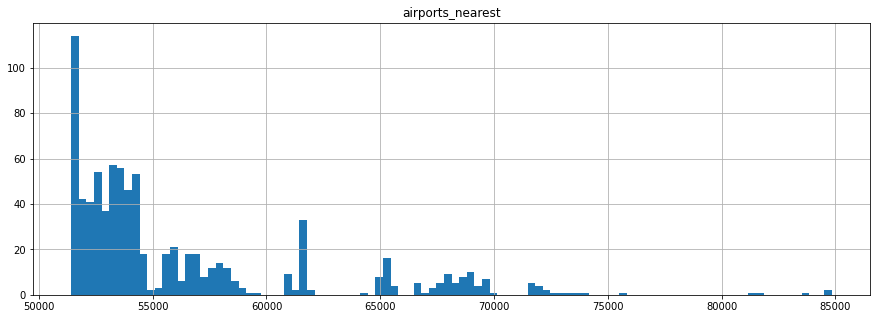

In [74]:
data = data.sort_values(by='airports_nearest')

# Вычисляем границы квантилей 5% и 95%
q05 = data['airports_nearest'].quantile(0.05)
q95 = data['airports_nearest'].quantile(0.95)

# Ограничиваем значения столбца 'airports_nearest' по границам квантилей
data90 = data[(data['airports_nearest'] >= q05) & (data['airports_nearest'] <= q95)]
data.hist('airports_nearest', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('airports_nearest', bins=100, figsize=(15,5))
plt.show()
min_airports_nearest_data = data.query('airports_nearest <= @q05')
min_airports_nearest_data.hist('airports_nearest', bins=100, figsize=(15, 5))
plt.show()
max_airports_nearest_data = data.query('airports_nearest >= @q95')
max_airports_nearest_data.hist('airports_nearest', bins=100, figsize=(15, 5))
plt.show()

In [75]:
min_airports_nearest_data['airports_nearest']

21085        0
4017      6450
12899     6450
7778      6914
23150     6949
         ...  
14766    11466
3628     11476
10893    11476
11332    11477
8690     11477
Name: airports_nearest, Length: 817, dtype: Int64

Выбивается нулевое значение - удалим

In [76]:
data = data.drop(index=data[data['airports_nearest'] == 0].index)

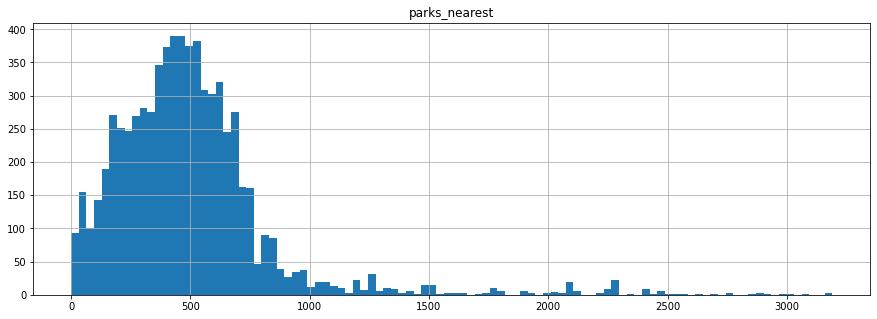

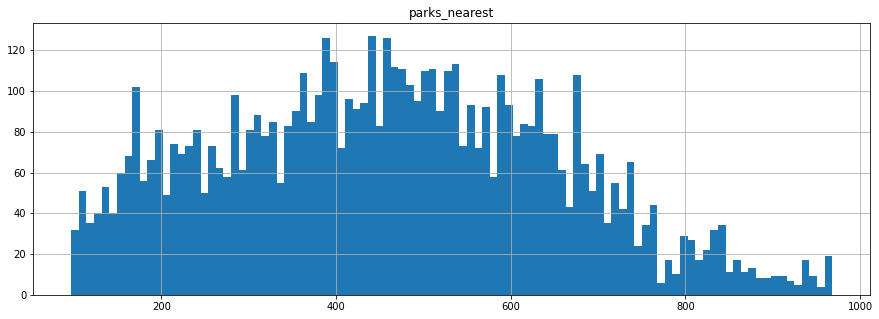

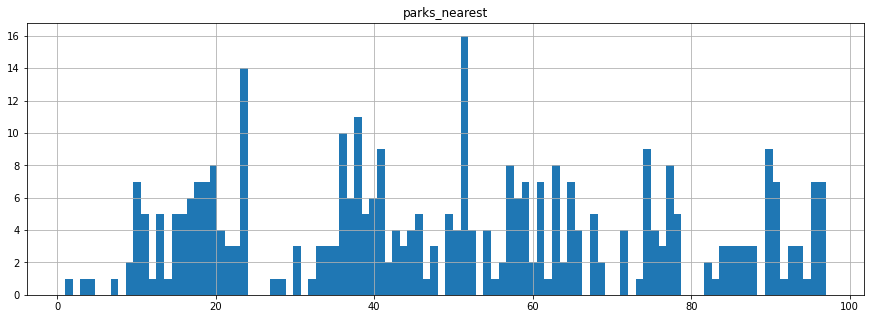

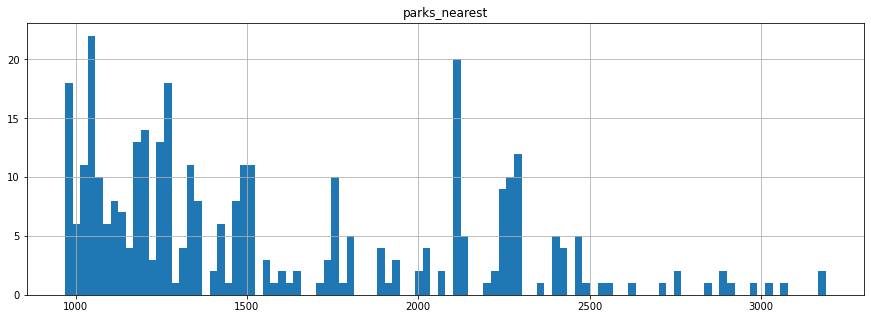

In [77]:
data = data.sort_values(by='parks_nearest')

# Вычисляем границы квантилей 5% и 95%
q05 = data['parks_nearest'].quantile(0.05)
q95 = data['parks_nearest'].quantile(0.95)

# Ограничиваем значения столбца 'parks_nearest' по границам квантилей
data90 = data[(data['parks_nearest'] >= q05) & (data['parks_nearest'] <= q95)]
data.hist('parks_nearest', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('parks_nearest', bins=100, figsize=(15,5))
plt.show()
min_parks_nearest_data = data.query('parks_nearest <= @q05')
min_parks_nearest_data.hist('parks_nearest', bins=100, figsize=(15, 5))
plt.show()
max_parks_nearest_data = data.query('parks_nearest >= @q95')
max_parks_nearest_data.hist('parks_nearest', bins=100, figsize=(15, 5))
plt.show()

Аномалий нет

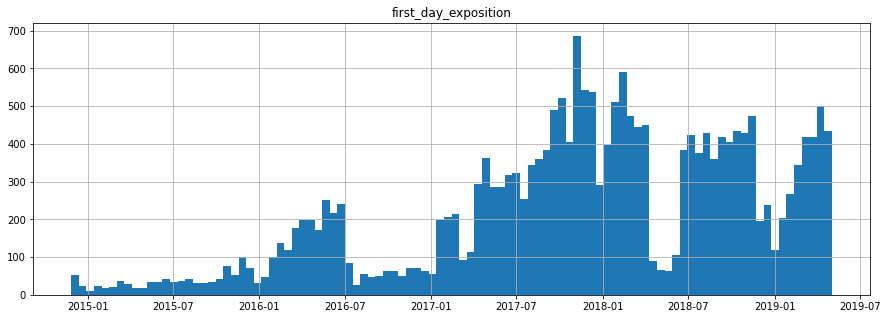

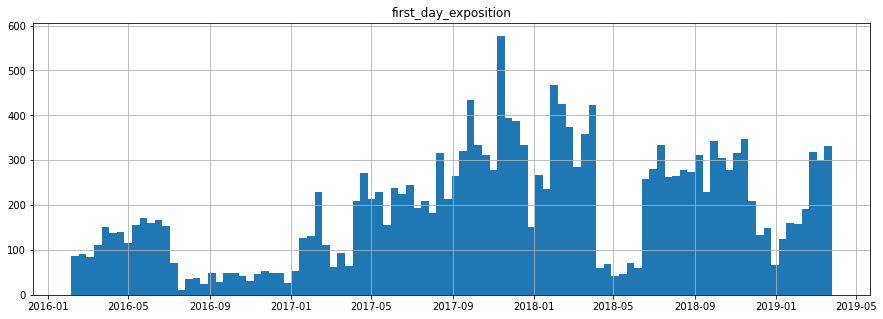

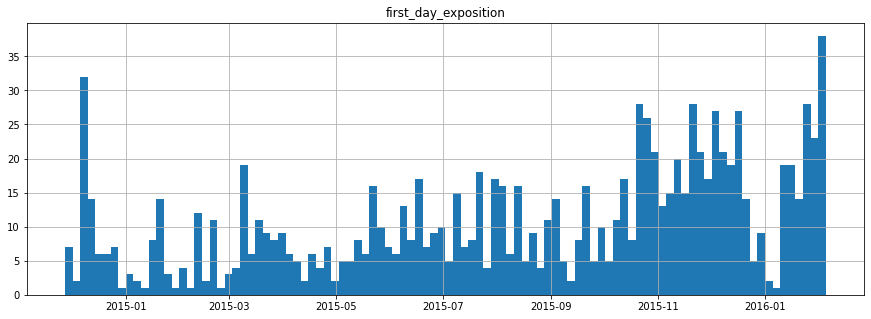

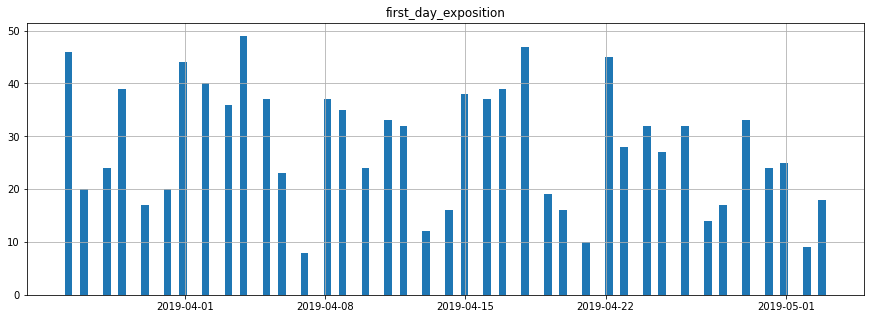

In [78]:
data = data.sort_values(by='first_day_exposition')

# Вычисляем границы квантилей 5% и 95%
q05 = data['first_day_exposition'].quantile(0.05)
q95 = data['first_day_exposition'].quantile(0.95)

# Ограничиваем значения столбца 'first_day_exposition' по границам квантилей
data90 = data[(data['first_day_exposition'] >= q05) & (data['first_day_exposition'] <= q95)]
data.hist('first_day_exposition', bins=100, figsize=(15,5))
# Строим гистограмму по ограниченным значениям
data90.hist('first_day_exposition', bins=100, figsize=(15,5))
plt.show()
min_first_day_exposition_data = data.query('first_day_exposition <= @q05')
min_first_day_exposition_data.hist('first_day_exposition', bins=100, figsize=(15, 5))
plt.show()
max_first_day_exposition_data = data.query('first_day_exposition >= @q95')
max_first_day_exposition_data.hist('first_day_exposition', bins=100, figsize=(15, 5))
plt.show()

Аномалий нет

### Посчитайте и добавьте в таблицу новые столбцы

In [79]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [80]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

In [81]:
data['city_centers_km'] = (data['cityCenters_nearest'] / 1000).astype('float64').round()

In [82]:
data['city_centers_km'] = data['city_centers_km'].astype('Int64')

In [83]:
data.sort_values(by='city_centers_km', inplace=True)

In [84]:
data['city_centers_km']

22036       0
8239        0
2988        0
2609        0
3800        0
         ... 
12003    <NA>
15072    <NA>
12343    <NA>
8170     <NA>
3254     <NA>
Name: city_centers_km, Length: 21456, dtype: Int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21456 entries, 22036 to 3254
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         21456 non-null  object        
 1   last_price            21456 non-null  Int64         
 2   total_images          21456 non-null  int64         
 3   days_exposition       21351 non-null  Int64         
 4   total_area            21456 non-null  float64       
 5   living_area           21456 non-null  float64       
 6   kitchen_area          21456 non-null  float64       
 7   ceiling_height        21456 non-null  float64       
 8   floors_total          21456 non-null  Int64         
 9   floor                 21456 non-null  int64         
 10  rooms                 21456 non-null  int64         
 11  balcony               21456 non-null  Int64         
 12  studio                21456 non-null  bool          
 13  open_plan    

### Проведите исследовательский анализ данных

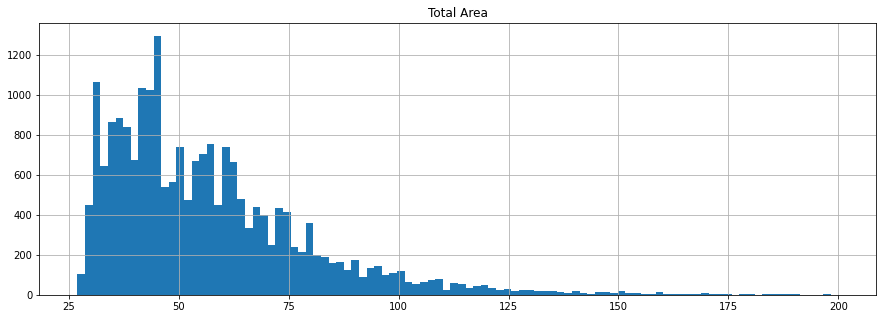

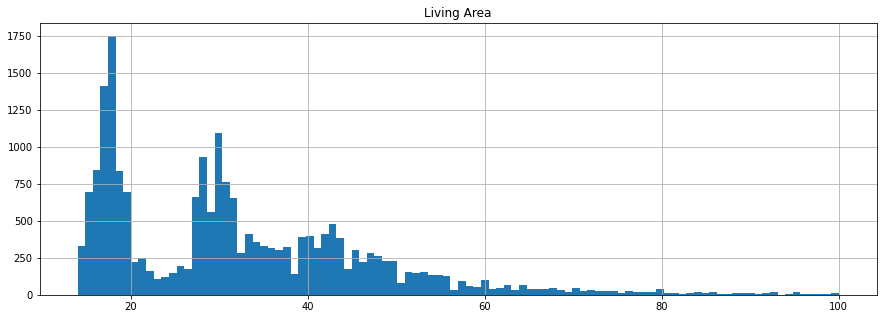

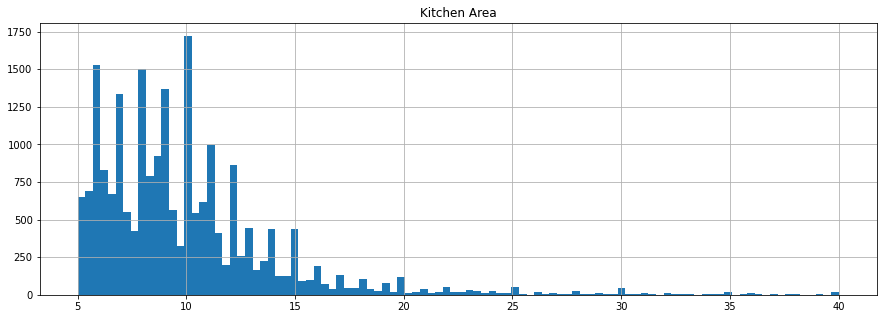

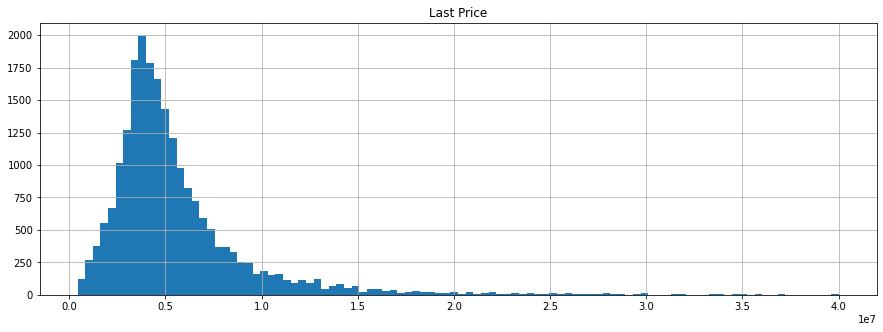

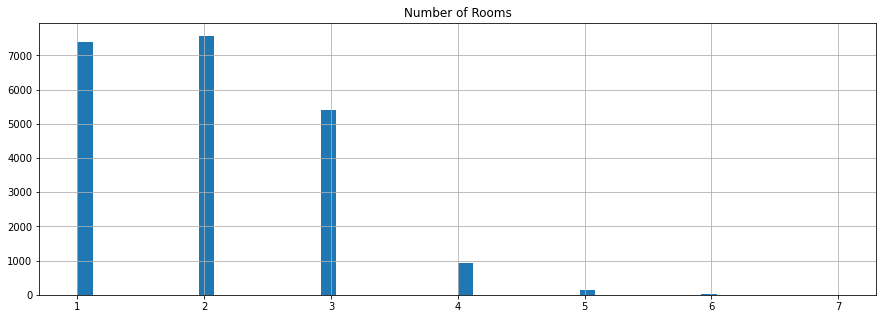

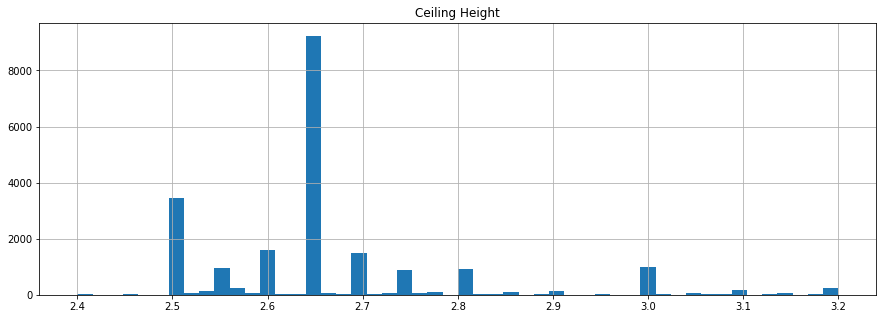

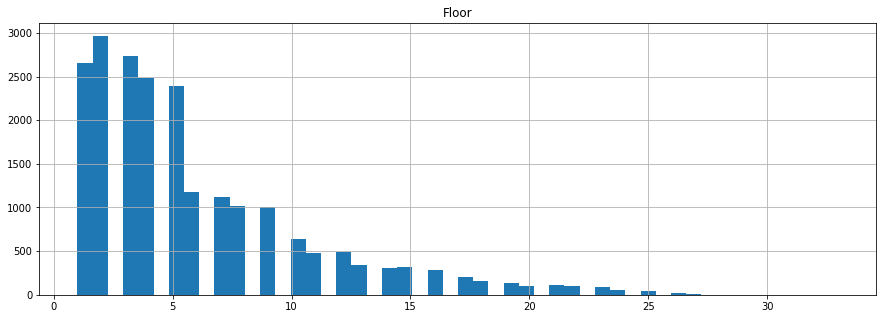

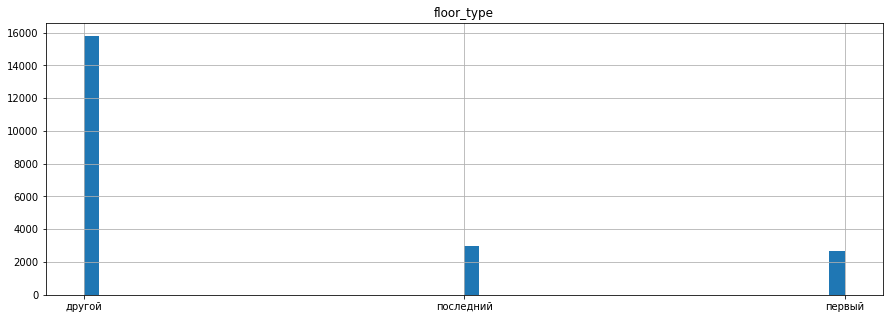

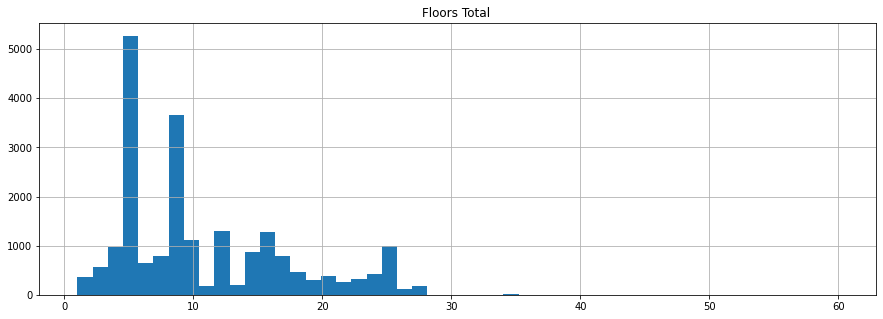

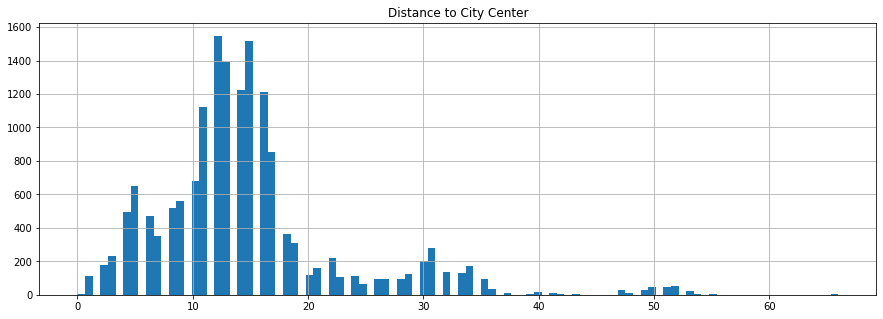

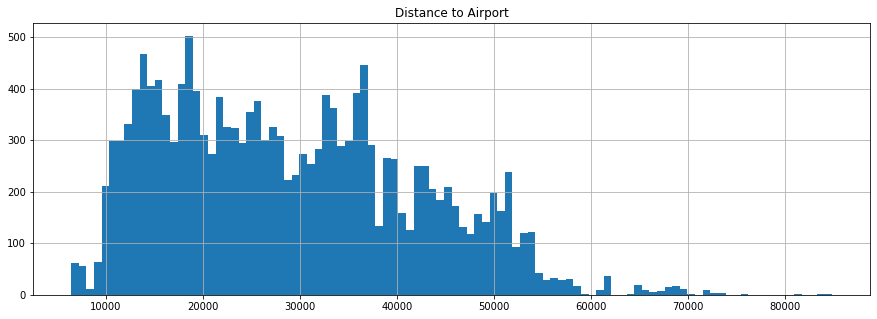

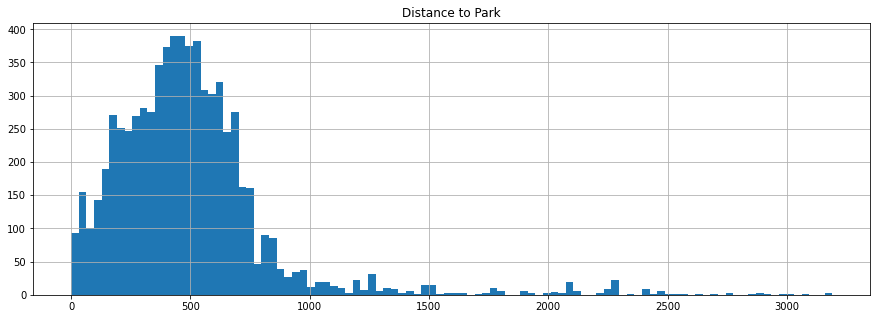

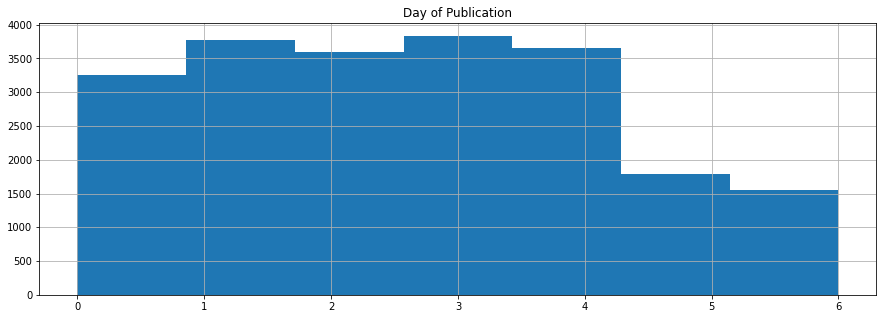

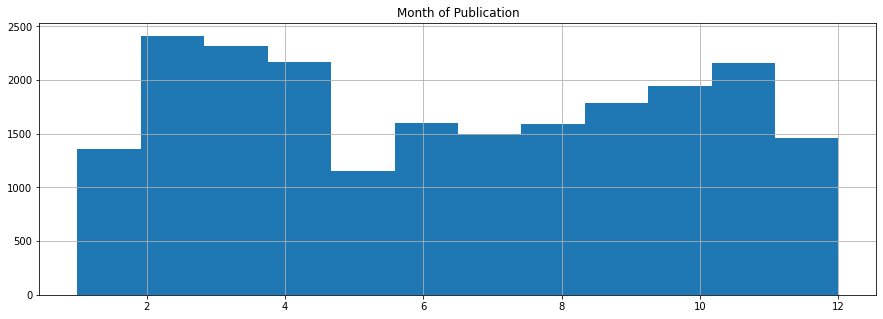

In [86]:
data.hist('total_area', bins=100, figsize=(15,5))
plt.title('Total Area')
plt.show()

data.hist('living_area', bins=100, figsize=(15,5))
plt.title('Living Area')
plt.show()

data.hist('kitchen_area', bins=100, figsize=(15,5))
plt.title('Kitchen Area')
plt.show()

data.hist('last_price', bins=100, figsize=(15,5))
plt.title('Last Price')
plt.show()

data.hist('rooms', bins=50, figsize=(15,5))
plt.title('Number of Rooms')
plt.show()

data.hist('ceiling_height', bins=50, figsize=(15,5))
plt.title('Ceiling Height')
plt.show()

data['floor'].hist(bins=50, figsize=(15,5))
plt.title('Floor')
plt.show()

data['floor_type'].hist(bins=50, figsize=(15,5))
plt.title('floor_type')
plt.show()

data['floors_total'].hist(bins=50, figsize=(15,5))
plt.title('Floors Total ')
plt.show()

data.hist('city_centers_km', bins=100, figsize=(15,5))
plt.title('Distance to City Center')
plt.show()

data.hist('airports_nearest', bins=100, figsize=(15,5))
plt.title('Distance to Airport')
plt.show()

data.hist('parks_nearest', bins=100, figsize=(15,5))
plt.title('Distance to Park')
plt.show()

data.hist('weekday', bins=7, figsize=(15,5))
plt.title('Day of Publication')
plt.show()

data.hist('month', bins=12, figsize=(15,5))
plt.title('Month of Publication')
plt.show()

Выводы:
1. Большинство квартир имеют общую площадь до 100 кв. метров, с пиком на 30-40 кв. метров.
2. Жилая площадь имеет два пика на значениях 14-17 кв. метром и 25-30 кв. метров - пики связаны с популярностью квартир студий в спб
3. Площадь кухни имеет пик на 10-12 кв. метров. Многие квартиры имеют кухню от 5 до 15 кв. метров. 
4. Цена объекта имеет большой разброс, но основной диапазон цен находится в пределах от 500 до 20 млн. рублей. С пиком в 3-4 млн рублей
5. Большинство квартир имеют 1-2 комнаты.
6. Высота потолков имеет пик в районе 2,65 м - как стандарт в центральной России.
7. Большинство квартир находится не на последнем и не на первом этаже, на первом и последнем находится около 3.5 тысяч квартир соответственно. Пик в районе 2-3 этажа
8. Большинство домов имеют не более 30 этажей. Пик приходится на 5 и 9 этажные здания
9. Большинство квартир расположено не более чем в 20км от центра. Пик в районе 10-12 км, что соотвествует наличию большого количества спальных районов, также есть удалённые квартиры в более чем 30км от центра. В центре питера находится около 1 тысячи квартир
10. Большинство квартир расположено не более чем в 35 км от аэропорта. Пик в районе 15 км, что соотвествует наличию большого количества спальных районов, также есть большое количтсво удалённы- квартир в более чем 30км от аэропорта.
11. У большинства квартир парк находится в пешей доступности - пик 500 м до парка
12. Чаще всего квартиры выставляют с понедельника по четверг, пик - среда
13. Чаще всего квартиры выставляют с февраля по апрель и затем с авнуста ноябрь. Пики - март и ноябрь

Выполним задание:
Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

In [87]:
data['days_exposition'].describe()

count    21351.000000
mean       151.801321
std        181.304023
min          1.000000
25%         36.000000
50%         80.000000
75%        193.000000
max       1000.000000
Name: days_exposition, dtype: float64

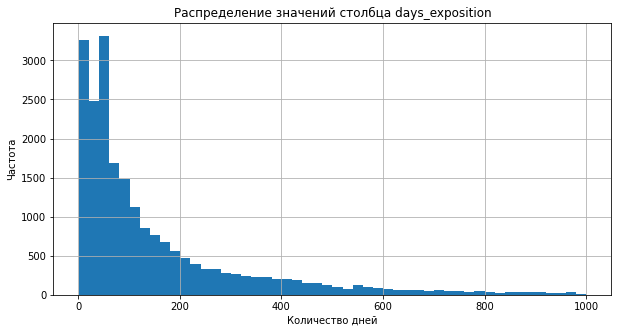

In [88]:
data['days_exposition'].hist(bins=50, figsize=(10,5))
plt.title('Распределение значений столбца days_exposition')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

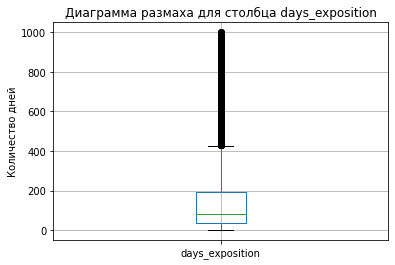

In [89]:
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха для столбца days_exposition')
plt.ylabel('Количество дней')
plt.show()

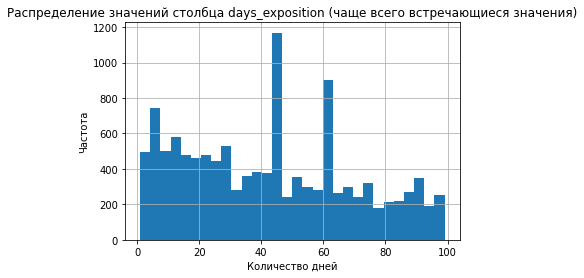

In [90]:
data.query('days_exposition < 100').hist('days_exposition', bins=30)
plt.title('Распределение значений столбца days_exposition (чаще всего встречающиеся значения)')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.show()

Вывод:
Из полученных данных можно сделать вывод, что большинство объявлений продаются в течение первых 3 месяцев - медианное значение равно 80 дням. Однако есть и довольно длинные сроки продаж - 75% объявлений продаются за 193 дня или меньше, в то время как максимальный срок продажи составил 1000 дней.
Пик продаж приходится на 40-60 дней, что может свидетельствовать о наличии пикового спроса на недвижимость в этот период.
Также были выявлены выбросы в виде объявлений, которые "висели" более 400 дней - эти значения могут быть связаны с особенностями продажи конкретных объектов, либо с ошибками в данных.

Выполним задание

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21456 entries, 22036 to 3254
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         21456 non-null  object        
 1   last_price            21456 non-null  Int64         
 2   total_images          21456 non-null  int64         
 3   days_exposition       21351 non-null  Int64         
 4   total_area            21456 non-null  float64       
 5   living_area           21456 non-null  float64       
 6   kitchen_area          21456 non-null  float64       
 7   ceiling_height        21456 non-null  float64       
 8   floors_total          21456 non-null  Int64         
 9   floor                 21456 non-null  int64         
 10  rooms                 21456 non-null  int64         
 11  balcony               21456 non-null  Int64         
 12  studio                21456 non-null  bool          
 13  open_plan    

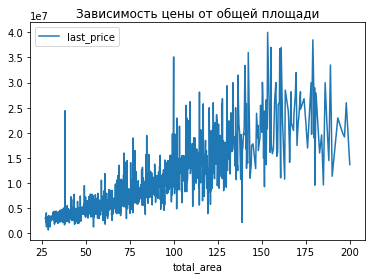

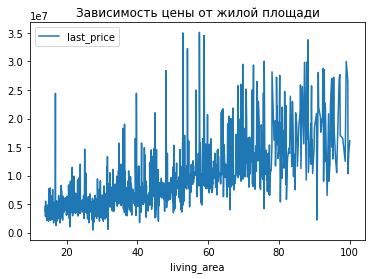

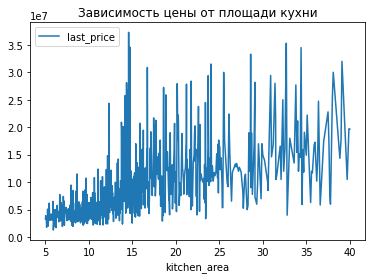

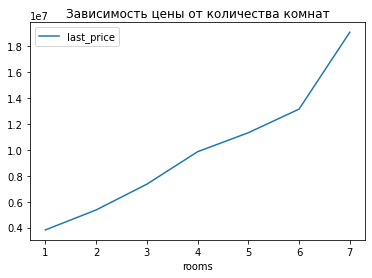

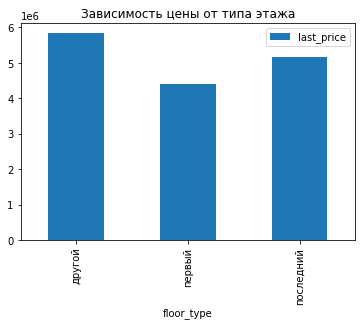

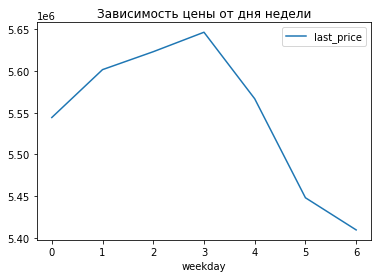

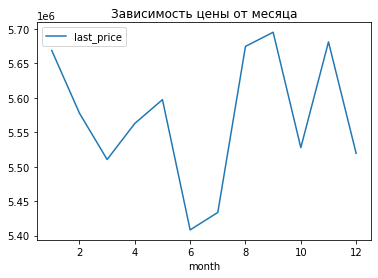

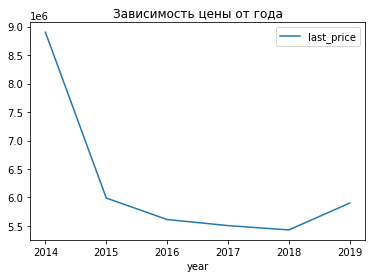

In [92]:
#Зависимость цены от общей площади
pivot = data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
pivot.plot(kind='line', title='Зависимость цены от общей площади')
plt.show()
# Зависимость цены от жилой площади
pivot = data.pivot_table(index='living_area', values='last_price', aggfunc='mean')
pivot.plot(kind='line', title='Зависимость цены от жилой площади')
plt.show()

# Зависимость цены от площади кухни
pivot = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
pivot.plot(kind='line',  title='Зависимость цены от площади кухни')
plt.show()

# Зависимость цены от количества комнат
pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
pivot.plot(kind='line',  title='Зависимость цены от количества комнат')
plt.show()

# Зависимость цены от типа этажа
pivot = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
pivot.plot(kind='bar',  title='Зависимость цены от типа этажа')
plt.show()

# Зависимость цены от дня недели
pivot = data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
pivot.plot(kind='line', title='Зависимость цены от дня недели')
plt.show()

# Зависимость цены от месяца
pivot = data.pivot_table(index='month', values='last_price', aggfunc='mean')
pivot.plot(kind='line',  title='Зависимость цены от месяца')
plt.show()

# Зависимость цены от года
pivot = data.pivot_table(index='year', values='last_price', aggfunc='mean')
pivot.plot(kind='line',  title='Зависимость цены от года')
plt.show()


In [93]:
columns = ['last_price','total_area', 'living_area', 'kitchen_area', 'rooms']
data_corr = data[columns].corr().style.background_gradient()
data_corr

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.753016,0.627127,0.588226,0.439955
total_area,0.753016,1.000000,0.917437,0.568187,0.775117
living_area,0.627127,0.917437,1.000000,0.315531,0.884586
kitchen_area,0.588226,0.568187,0.315531,1.000000,0.157983
rooms,0.439955,0.775117,0.884586,0.157983,1.000000


На основе графиков можно сделать следующие выводы:
1. Видная явная положительная корреляция:
    1) Корреляция стоимости относительно общей площади - 0.753016
    
    2) Корреляция стоимости относительно жилой площади - 0.627127
    
    3) Корреляция стоимости относительно площади кухни - 0.588226
    
    4) Корреляция стоимости относительно количества комнат - 0.439955
    
    Что говорит о том, что стоимости квартиры максимально зависит от общей площади, чуть меньше от жилой площади, примерно на таком же уровне корреляция относительно площади кухни, меньше всего относительно других признаков корреляция относительн количества комнат - 0.439955
1. Заметна яркая зависимость цены от общей, жилой площади и площади кухни, есть выбросы, они связанны с различной стоимостью примерно одинаковых квартир в различных местах спб и Лен. области.
2. Количество комнат также имеет положительную корреляцию с ценой, до 6 комнат включительно рост равномерный, для 7 комнат характерен резкий скачок в цене 
3. Квартиры на последнем этаже, как правило, дороже, чем на первом. Квартиры на других этажах имеют промежуточную цену.
4. Для цен характерен рост цены с понедельник по среду, после цена начинает падать, достигая минимума в субботу.
5. График зависимсоти цены от месяца имеет интересную тенденцию - начиная с января и до марта цена падает, затем начиная с марта и до мая цена растёт, затем резко падает начиная с мая и держиться минимальной с июня по июль, в июле цена начинает резко расти и достигает пика в сентябре, затем цена снова падает к октябрю и снова начинает падать к дебарю и затем к декабрю возвращается на уровень октября
5. Стоимость квартир имеет тенденцию к резкому падению в 2014-2015 годах. С 2016-2018 года цены примерно на одном уровне относительно года. В 2018 году цены начинают снова расти.


Выполним задание: Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Отфильтруем таблицу по населённым пунктам, с наибольшим числом объявлений.

In [94]:
top_10_localities = data['locality_name'].value_counts().head(10).index.tolist()
top_10_localities


['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг']

Сгруппируем данные по населённым пунктам и вычислим среднюю цену за квадратный метр.

In [95]:
locality_price = (
    data.query('locality_name in @top_10_localities')
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean')
)
locality_price = locality_price.reset_index().sort_values(by='square_meter_price', ascending=False)
locality_price


,locality_name,square_meter_price
9,санкт-петербург,110184.854935
8,пушкин,102623.668062
3,деревня кудрово,91871.296521
6,поселок парголово,89798.821578
5,поселок мурино,84181.809501
7,поселок шушары,77363.472371
4,колпино,75166.230765
2,гатчина,69154.64574
0,всеволожск,68624.65542
1,выборг,57309.573725


Чтобы было более понятно, выведем данны в виде диаграммы распределения

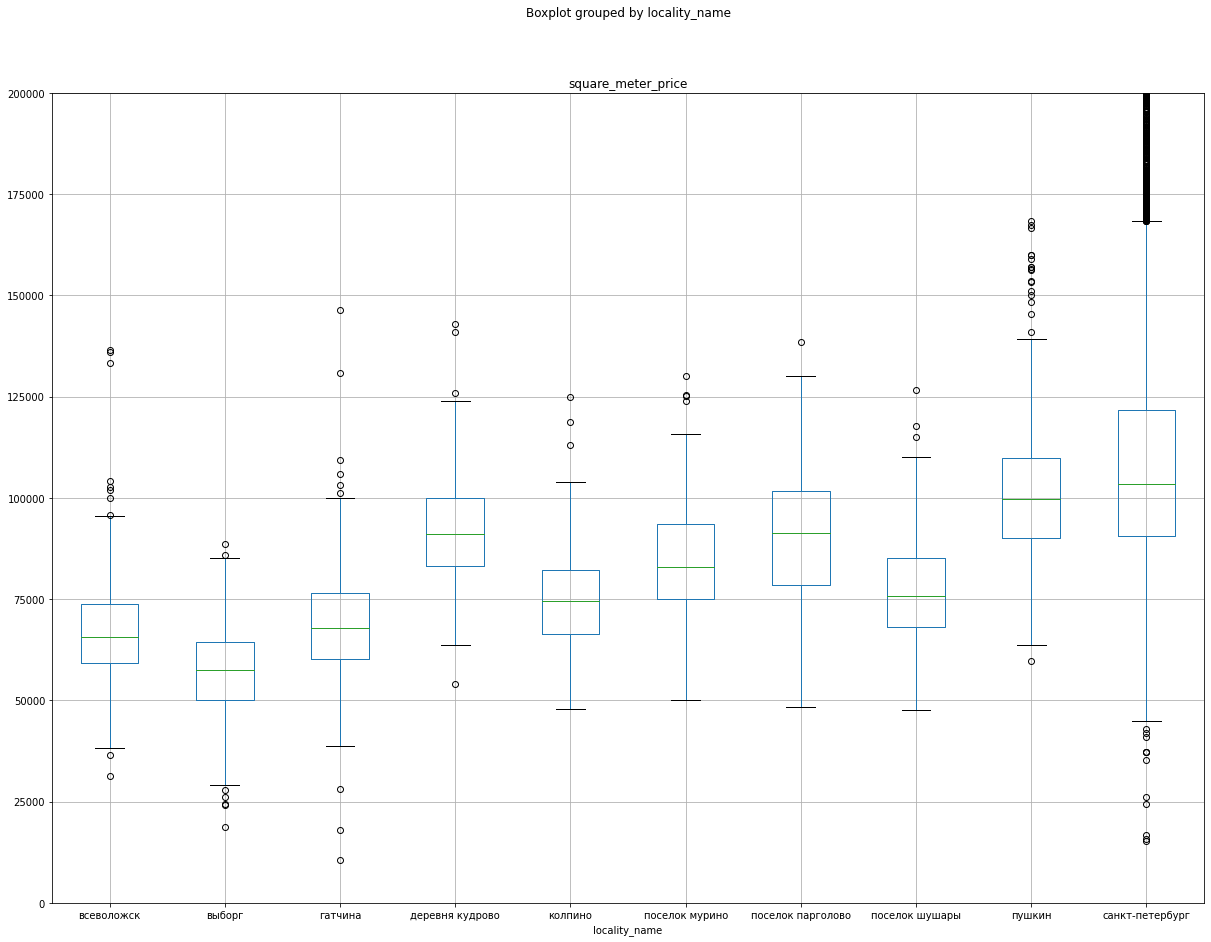

In [96]:
plot = (
    data[data.locality_name.isin(locality_price['locality_name'])]
    .boxplot('square_meter_price', by='locality_name',figsize=(20,15))
    .set_ylim(0,200000)
)

Вывод:
1. Большинство значений лежит в диапазоне от 60 000 до 120 000 рублей за квадратный метр;
2. Средняя цена за квадратный метр в населенных пунктах с наибольшим числом объявлений составляет около 75 000 рублей;
3. В спб самый дорогой квадратный метр - 110153.684471 рублей, Примерно на том же уровне Пушкин - 102628.01007 рублей, населёным пунктом, с самым дешёвым квадратным метром оказался Выборг с ценой в 57309.573725 рублей
4. Для каждого населёного пункта характерен хвост в виде более дешёвого и более дорого квадратного метра, заметно большое количество квартир с высокой стоимостью квадратного метра в спб

Выполним задние: Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [97]:
spb_data = data.loc[data['locality_name'] == 'санкт-петербург']

# Группируем данные по расстоянию до центра города и вычисляем среднюю цену за квадратный метр
price_per_sqm_by_distance = (
    spb_data
    .groupby('city_centers_km')['square_meter_price']
    .mean()
    .to_frame()
    .reset_index()
)

price_per_sqm_by_distance


,city_centers_km,square_meter_price
0,0,116488.02679
1,1,133527.79573
2,2,135963.730616
3,3,116456.791172
4,4,128256.379013
5,5,136864.438738
6,6,136528.615973
7,7,137130.128441
8,8,122798.081179
9,9,112046.281585


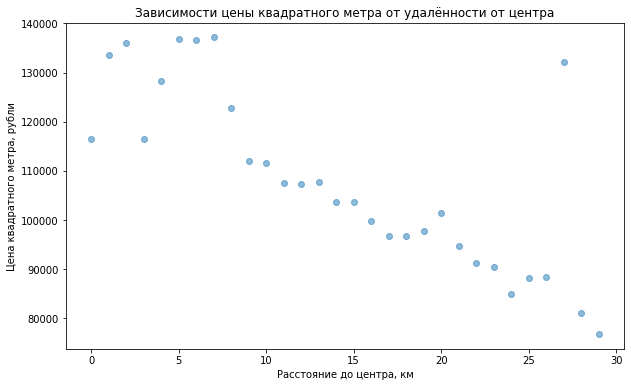

In [98]:
x = price_per_sqm_by_distance['city_centers_km']
y = price_per_sqm_by_distance['square_meter_price']

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена квадратного метра, рубли')
plt.title('Зависимости цены квадратного метра от удалённости от центра')
plt.show()

Вывод:
1. Заметна малая убывающая зависимость цены квадратного метра от удалённости от центра, в центре цена около 125000 рублей за квадратный киллометр, на расстрояни в 20 км и более цена варьируется около 55000 - 100000 рублей
2. Для центра(удалённость до 7 км) характерны квартиры с дорогим квадратным метром, это заметно по выбросам
3. Для окраин заметна стабильная стоимость цены за квадртный метр
4. Заметен выбро при расстоянии до центра - 27км, где стоимость квадратного метра 130000 - это могут быть различные пром. зоны или дорогие участки в каком-то населённом пункте в 27 км от центра

### Общий вывод


Общий вывод:
1. большинство объявлений продаются в течение первых 3 месяцев - медианное значение равно 80 дням. Однако есть и довольно длинные сроки продаж - 75% объявлений продаются за 193 дня или меньше, в то время как максимальный срок продажи составил 1000 дней.
2. Пик продаж приходится на 40-60 дней, что может свидетельствовать о наличии пикового спроса на недвижимость в этот период.
3. Также были выявлены выбросы в виде объявлений, которые "висели" более 400 дней - эти значения могут быть связаны с 
    особенностями продажи конкретных объектов, либо с ошибками в данных.
4. Стоимость квартиры максимально зависит от общей площади - корреляция положительна и составляет 0.753016, чуть меньше от жилой 
    площади - 0.627127 , примерно на таком же уровне корреляция относительно площади кухни - 0.588226, меньше всего относительно 
    других признаков корреляция относительн количества комнат - 0.439955. Что логично, в первую очередь цениться общая площадь, 
    которую можно в крайнем случае распределить как захочется, во вторую жилая площадь, чем больше площадь тем больше кислорода, 
    тоже самое касается кухни, от количнства комнат корреляция не так велика, так как количество комнат ещё ничего не говорит о 
    площади и необходимости этих комнат.
6. Квартиры на последнем этаже, как правило, дороже, чем на первом. Квартиры на других этажах имеют промежуточную цену.
7. Для цен характерен рост цены с понедельник по среду, после цена начинает падать, достигая минимума в субботу.
8. График зависимсоти цены от месяца имеет интересную тенденцию - начиная с января и до марта цена падает, затем начиная с 
    марта и до мая цена растёт, затем резко падает начиная с мая и держиться минимальной с июня по июль, в июле цена начинает 
    резко расти и достигает пика в сентябре, затем цена снова падает к октябрю и снова начинает падать к дебарю и затем к 
    декабрю возвращается на уровень октября.
9. Стоимость квартир имеет тенденцию к резкому падению в 2014-2015 годах. С 2016-2018 года цены примерно на одном уровне 
    относительно года. В 2018 году цены начинают снова расти.
10. Большинство значений лежит в диапазоне от 60 000 до 120 000 рублей за квадратный метр.
11. Средняя цена за квадратный метр в населенных пунктах с наибольшим числом объявлений составляет около 75 000 рублей;
12. В спб самый дорогой квадратный метр - 110153.684471 рублей, Примерно на том же уровне Пушкин - 102628.01007 рублей, 
    населёным пунктом, с самым дешёвым квадратным метром оказался Выборг с ценой в 57309.573725 рублей
13. Для каждого населёного пункта характерен хвост в виде более дешёвого и более дорого квадратного метра, заметно большое 
    количество квартир с высокой стоимостью квадратного метра в спб
14. Заметна малая убывающая зависимость цены квадратного метра от удалённости от центра, в центре цена около 125000 рублей за 
    квадратный киллометр, на расстрояни в 20 км и более цена варьируется около 55000 - 100000 рублей
15. Для центра(удалённость до 7 км) характерны квартиры с дорогим квадратным метром, это заметно по выбросам
16. Для окраин заметна стабильная стоимость цены за квадртный метр

Рекомендации маркетплейсу по продаже недвижимости:
1. Добавить определение более точного местоположение квартиры, с помощью которого можно было бы автоматически определять расстояние до ... , а также количество объектов инфраструктуры во круг квартиры
2. Группировку столбцов во время сбора данных сделать более логичной
3. Для столбцов: balcony,floors_total, parks_around3000, ponds_around3000, last_price, arks_nearest, ponds_nearest, cityCenters_nearest, days_exposition  - записывать целочисленные значения
4. Данные о квартире сделать более подробными и обязательными
5. Добавить отдельный сервис для продажи комерческой недвижимости